# Machine Learning - Group Project
**Group Members**:
- 
- 
-
-
-Tagunova, Maiia (m20210984@novaims.unl.pt)
-Canhoto, Vera (m20210659@novaims.unl.pt)

In [1]:
# Jupyter notebook display size adjustment
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

<a class="anchor" id="0.1"></a>

# **Table of Contents**

1. [Business Understanding](#1)
   - 1.1 [Business Objectives](#1.1)
   - 1.2 [Programming Languages and Libraries](#1.2)
   - 1.3 [Project Plan](#1.3)


2. [Data Understanding](#2)
   - 2.1 [Initial Data Collection](#2.1)
   - 2.2 [Data Description](#2.2)
   - 2.3 [Data Exploration](#2.3)
   -2.3.1 [Data Visual exploration](#2.3.1)
   - 2.4 [Data Quality Verification](#2.4)
   -2.4.1 [Coherence check ](#2.4.1)
   -2.4.2 [Data editing ](#2.4.2)
   -2.4.2.1 [Fix wrong data types](#2.4.2.1)
   -2.4.2.2 [Outliers](#2.4.2.2)
   -2.4.3 [Data cleansing](#2.4.3)
   -2.4.4 [Data wrangling](#2.4.4)
   -2.4.5 [Data reduction](#2.4.5)
   -2.4.6 [Redo data exploration](#2.4.6)
   - 2.5 [Definition of the initial Metric and Non-metric Features](#2.5)
  
  
3. [Feature Selection](#3)

4. [Final Selected features](#4)


5. [Re-Sampling Techniques for Imbalanced Classification](#5)
   
   
6. [Modeling](#6)
 
   
7. [Models Comparisson](#7)
 
 
8. [Final Model - Kaggle Submission](#8)

# 1. Business Understanding <a class="anchor" id="1"></a>

## 1.1 Business Objective <a class="anchor" id="1.1"></a>

To 

## 1.2 Programming Languages and Libraries <a class="anchor" id="1.1"></a>

**Programming Language:** Python

**Available / utilized libraries**

In [2]:
import time
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.linear_model import Ridge, LassoCV, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.feature_selection import RFE

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_recall_fscore_support

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline

from collections import Counter

%config InlineBackend.figure_format = 'retina'

from datetime import datetime

from math import ceil

from itertools import product
from pandas_profiling import ProfileReport

import scipy.stats as stats

sns.set()

%matplotlib inline

## 1.3 Project Plan  <a class="anchor" id="1.4"></a>

# 2. Data Understanding <a class="anchor" id="2"></a>

## 2.1 Initial Data Collection <a class="anchor" id="2.1"></a>

We have only one source of data hence assessment of potential quality problem from data merge is not applicable

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#train_buy = train['Buy']
#train.drop(columns=['Buy'], inplace=True)

#identify data as being test or train so that we can separate them later on
train["Split"] = "train"
test["Split"] = "test"

#merge both data sets to facilitate the exploration and cleaning of the data

frames = [train, test]

data = pd.concat(frames)


In [4]:
data.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,Split
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0.0,train
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0.0,train
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0.0,train
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1.0,train
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1.0,train


In [5]:
data.tail()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,Split
2295,962042726,27-Nov-20,10,720.5,2,88.725,220,10580.3448,0.0048,0.0221,0.0000,Windows,2,Portugal,1,Returner,NaN,test
2296,962063064,20-Mar-20,0,0.0,0,0.000,3,55.0000,0.0667,0.1000,0.0000,MacOSX,2,Spain,3,Returner,NaN,test
2297,962147749,22-Nov-20,2,45.5,0,0.000,22,535.0000,0.0000,0.0250,9.6503,Windows,2,Spain,11,Returner,NaN,test
2298,962182167,19-Nov-20,8,166.7,0,0.000,9,171.7000,0.0167,0.0500,0.0000,Windows,2,Portugal,3,Returner,NaN,test
2299,962218682,18-May-20,1,107.0,0,0.000,27,839.6667,0.0214,0.0367,0.0000,MacOSX,2,Spain,13,Returner,NaN,test


## 2.2 Data Description  <a class="anchor" id="2.2"></a>
Based on the metadata provided:

### Metadata
Access_ID - Unique identification of the user access to the website<br>
Date - Website visit date<br>
AccountMng_Pages - Number of pages visited by the user about account management<br>
AccountMng_Duration - Total amount of time (seconds) spent by the user on account management related pages<br>
FAQ_Pages - Number of pages visited by the user about frequently asked questions, shipping information and company related pages<br>
FAQ_Duration - Total amount of time (seconds) spent by the user on FAQ pages<br>
Product_Pages - Number of pages visited by the user about products and services offered by the company<br>
Product_Duration - Total amount in time (seconds) spent by the user on products and services related pages<br>
GoogleAnalytics_BounceRate - Average bounce rate value of the pages visited by the user, provided by google analytics<br>
GoogleAnalytics_ExitRate - Average exit rate value of the pages visited by the user, provided by google analytics<br>
GoogleAnalytics_PageValue - Average page value of the pages visited by the user, provided by google analytics<br>
OS - Operating System of the user<br>
Browser - Browser used to access the webpage<br>
Country - The country of the user<br>
Type_of_Traffic - Traffic Source by which the user has accessed the website (e.g., email, banner, direct)<br>
Type_of_Visitor - User type as "New access", "Returner" or "Other"<br>
Buy - Class label indicating if the user finalized their actions in the website with a transaction<br>

## 2.3 Data Exploration  <a class="anchor" id="2.3"></a>

In [6]:
# Check default import data types of the features
# There are no nan values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12299 entries, 0 to 2299
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   12299 non-null  int64  
 1   Date                        12299 non-null  object 
 2   AccountMng_Pages            12299 non-null  int64  
 3   AccountMng_Duration         12299 non-null  float64
 4   FAQ_Pages                   12299 non-null  int64  
 5   FAQ_Duration                12299 non-null  float64
 6   Product_Pages               12299 non-null  int64  
 7   Product_Duration            12299 non-null  float64
 8   GoogleAnalytics_BounceRate  12299 non-null  float64
 9   GoogleAnalytics_ExitRate    12299 non-null  float64
 10  GoogleAnalytics_PageValue   12299 non-null  float64
 11  OS                          12299 non-null  object 
 12  Browser                     12299 non-null  int64  
 13  Country                     1229

In [7]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Access_ID,12299.0,NaN,NaN,NaN,532106260.086105,248331987.130444,102863333.0,313593213.5,534176203.0,749165323.5,962218682.0
Date,12299,305,5-May-20,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountMng_Pages,12299.0,NaN,NaN,NaN,2.317831,3.324224,0.0,0.0,1.0,4.0,27.0
AccountMng_Duration,12299.0,NaN,NaN,NaN,80.939384,176.954932,0.0,0.0,8.0,93.5,3398.75
FAQ_Pages,12299.0,NaN,NaN,NaN,0.504025,1.271059,0.0,0.0,0.0,0.0,24.0
FAQ_Duration,12299.0,NaN,NaN,NaN,34.504445,140.875199,0.0,0.0,0.0,0.0,2549.375
Product_Pages,12299.0,NaN,NaN,NaN,31.731279,44.474051,0.0,7.0,18.0,38.0,705.0
Product_Duration,12299.0,NaN,NaN,NaN,1194.583691,1913.049335,0.0,183.9375,598.8738,1465.8219,63973.5222
GoogleAnalytics_BounceRate,12299.0,NaN,NaN,NaN,0.022193,0.048486,0.0,0.0,0.0031,0.0168,0.2
GoogleAnalytics_ExitRate,12299.0,NaN,NaN,NaN,0.043066,0.048602,0.0,0.0143,0.0251,0.05,0.2


In [8]:
# Check the number of entries, also to check if the merge was made correctly
data.shape

(12299, 18)

In [9]:
test.shape

(2300, 17)

In [10]:
train.shape

(9999, 18)

In [11]:
# Check for duplicates
data.duplicated().sum()

0

In [12]:
# Check for duplicates Access_ID
data.duplicated(subset='Access_ID').sum()

0

## 2.3.1 Data Visual exploration   <a class="anchor" id="3.1"></a>

In [13]:
#Define metric and non-metric features

metric_features = [
    "AccountMng_Pages",
    "AccountMng_Duration",
    "FAQ_Pages",
    "FAQ_Duration",
    "Product_Pages",
    "Product_Duration",
    "GoogleAnalytics_BounceRate",
    "GoogleAnalytics_ExitRate",
    "GoogleAnalytics_PageValue"
]

non_metric_features = [
    "OS",
    "Country",
    "Date",
    "Type_of_Visitor",
    "Browser",
    "Type_of_Traffic"
]

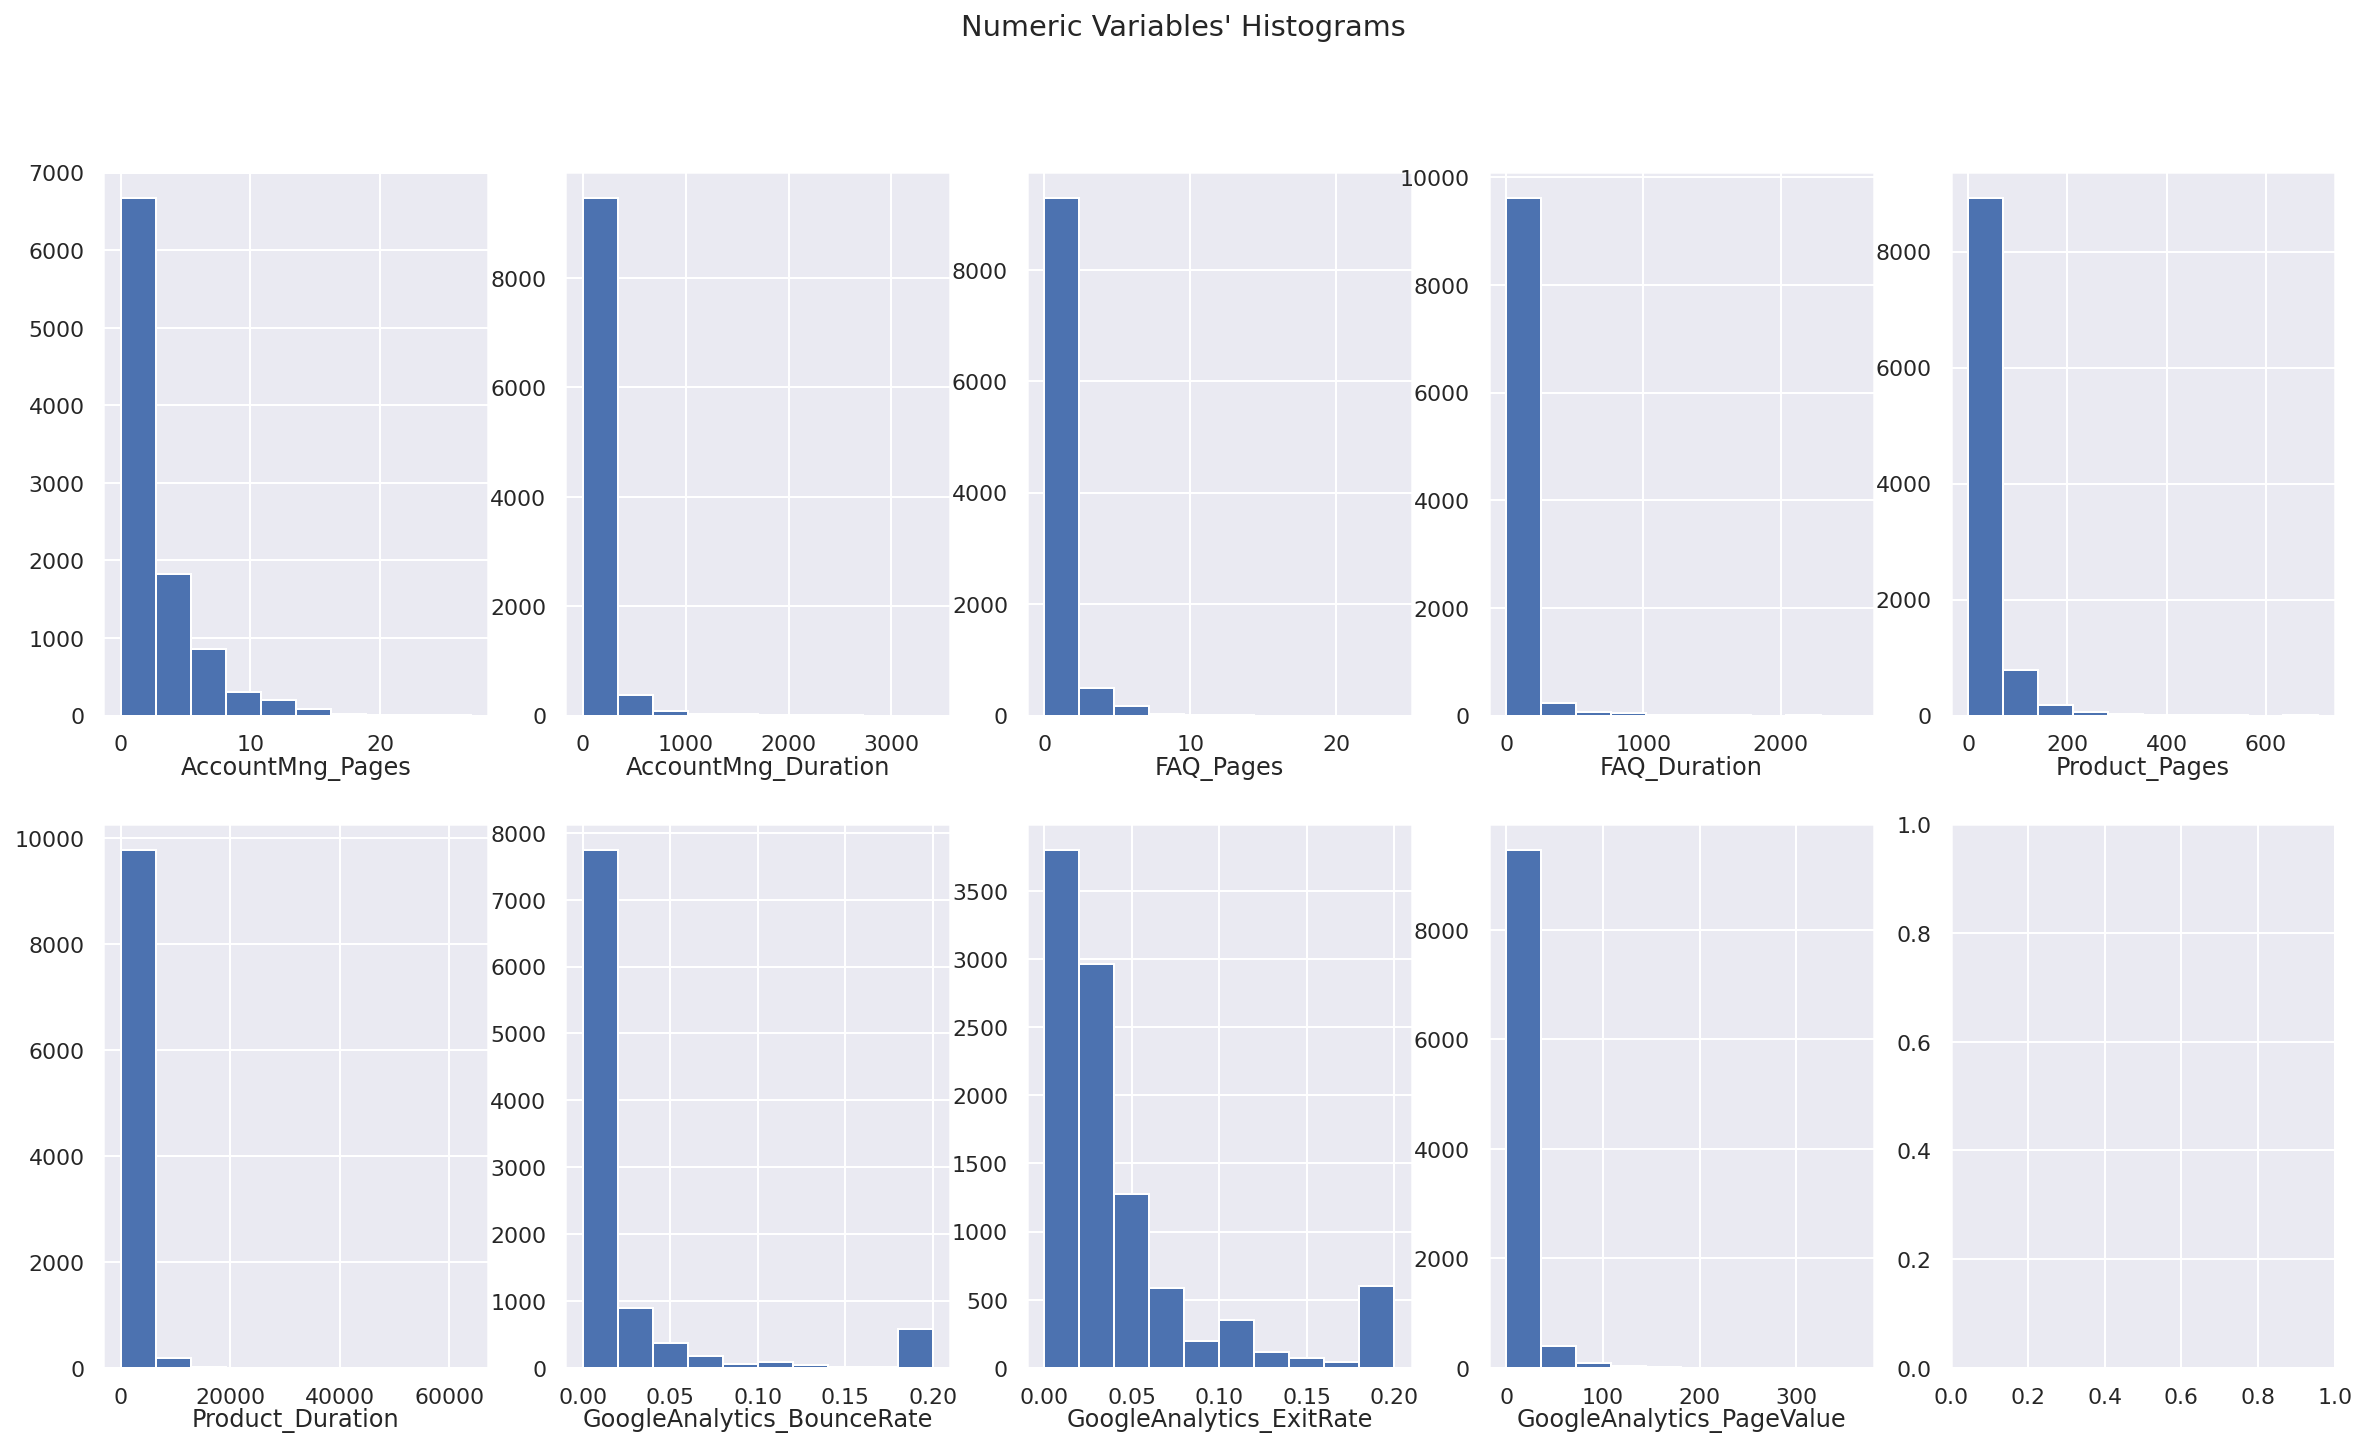

In [14]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

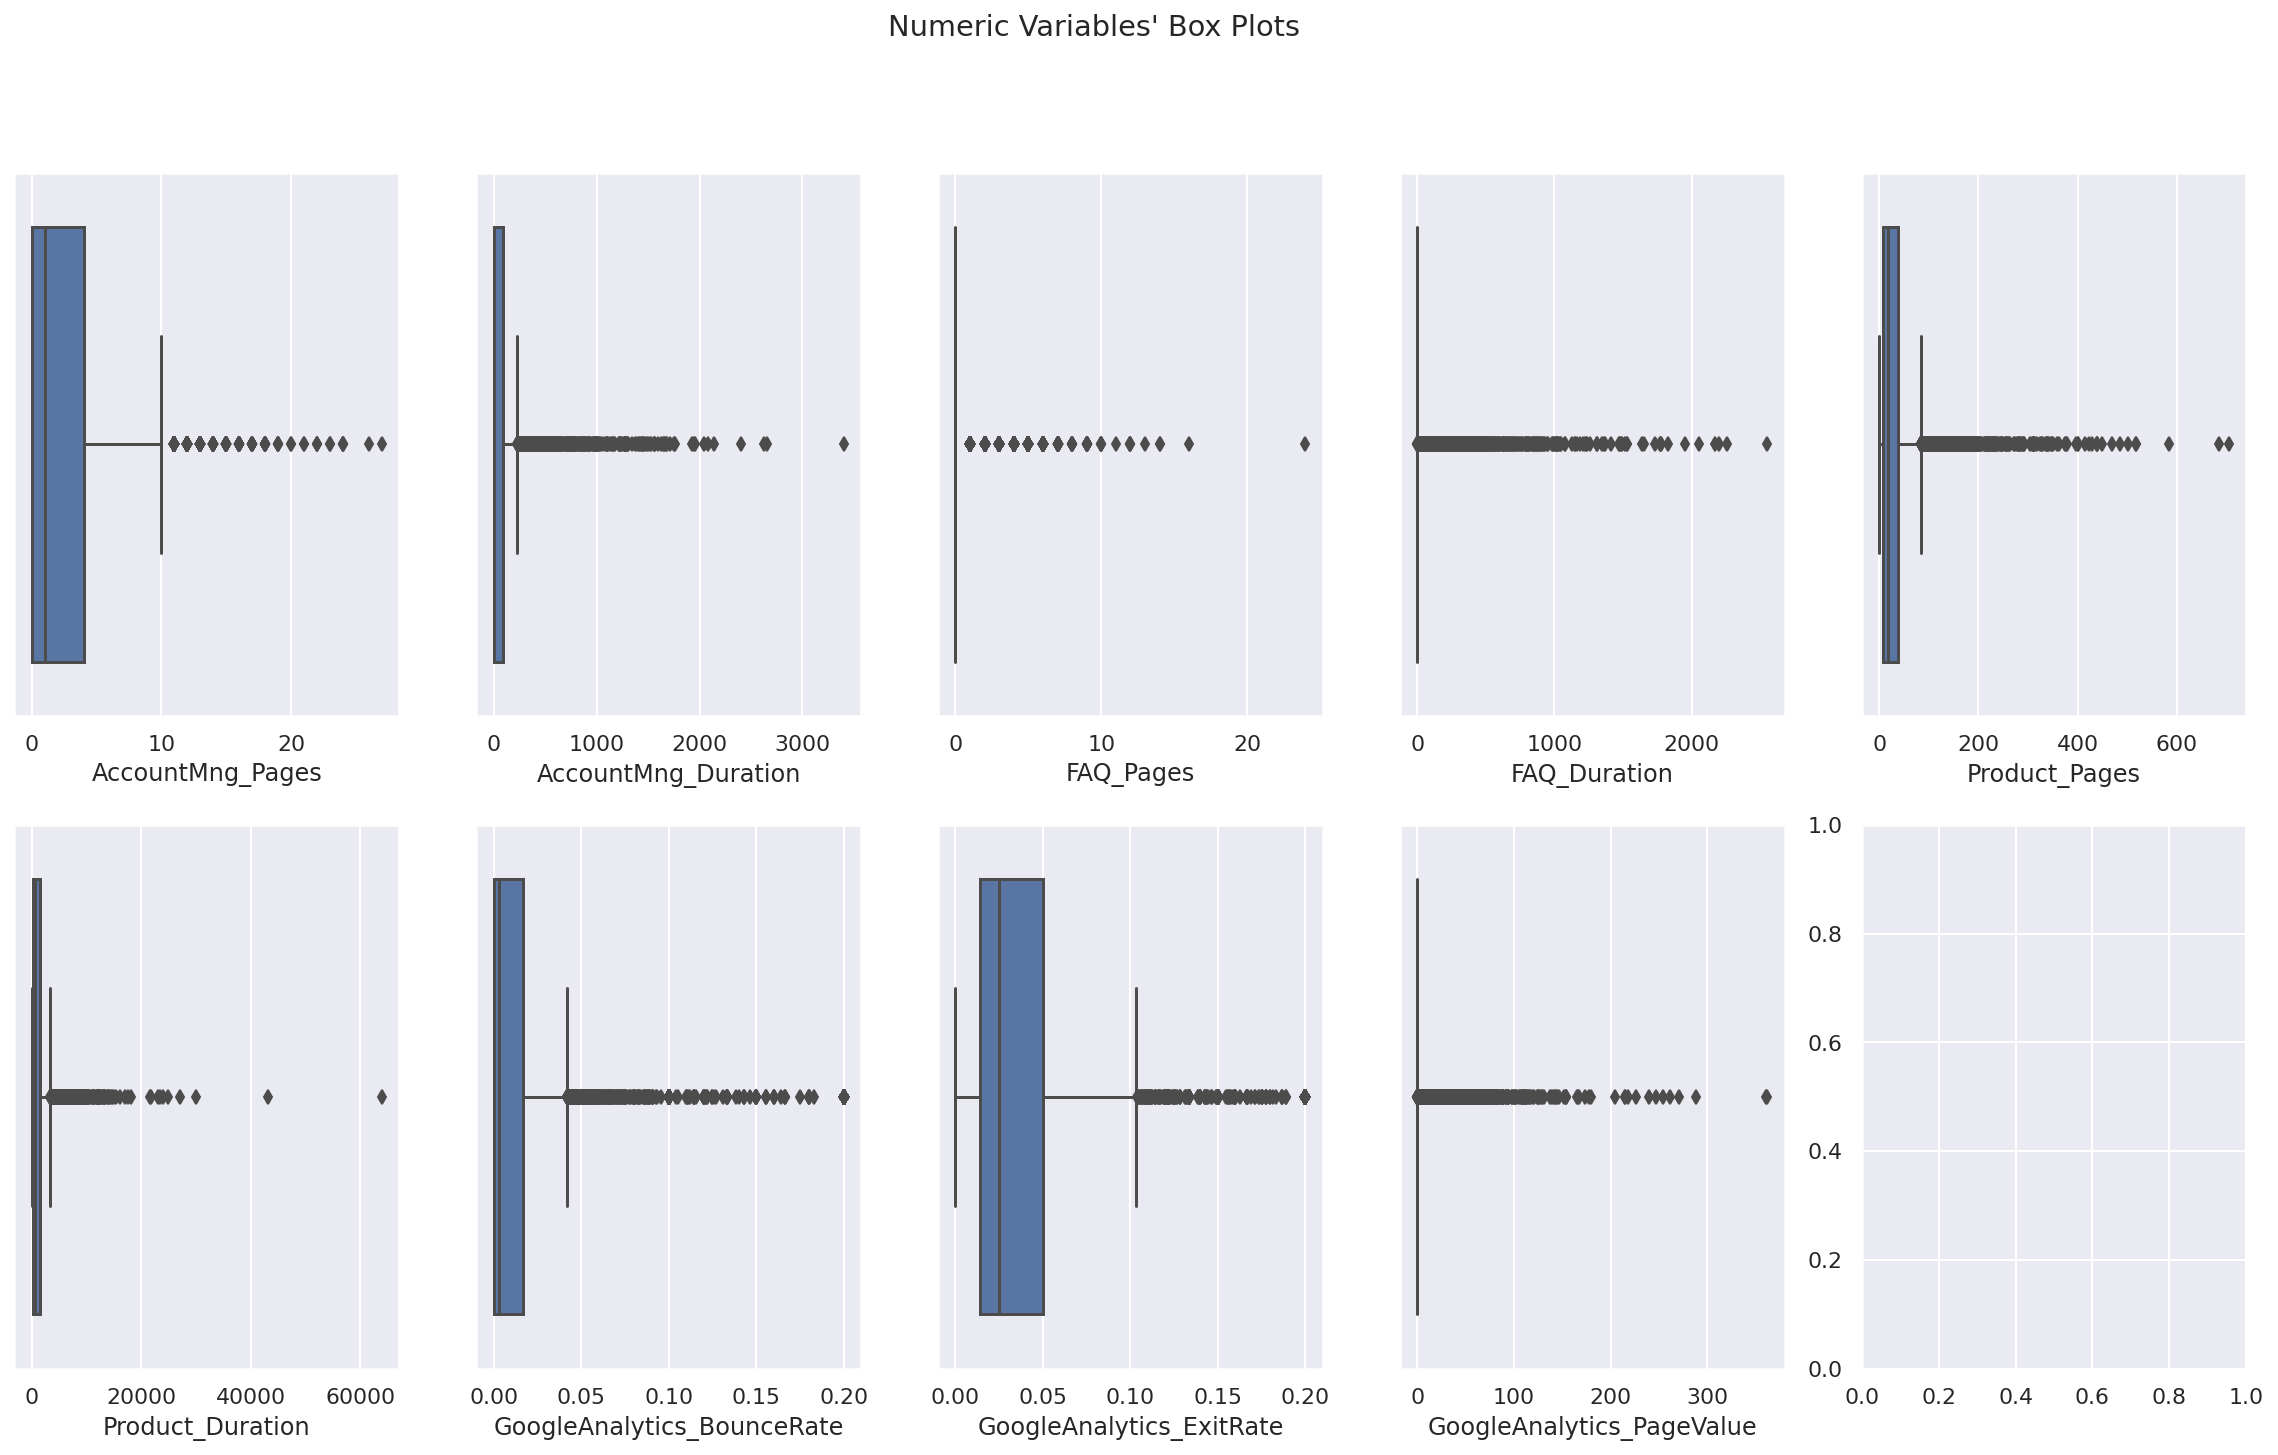

In [15]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

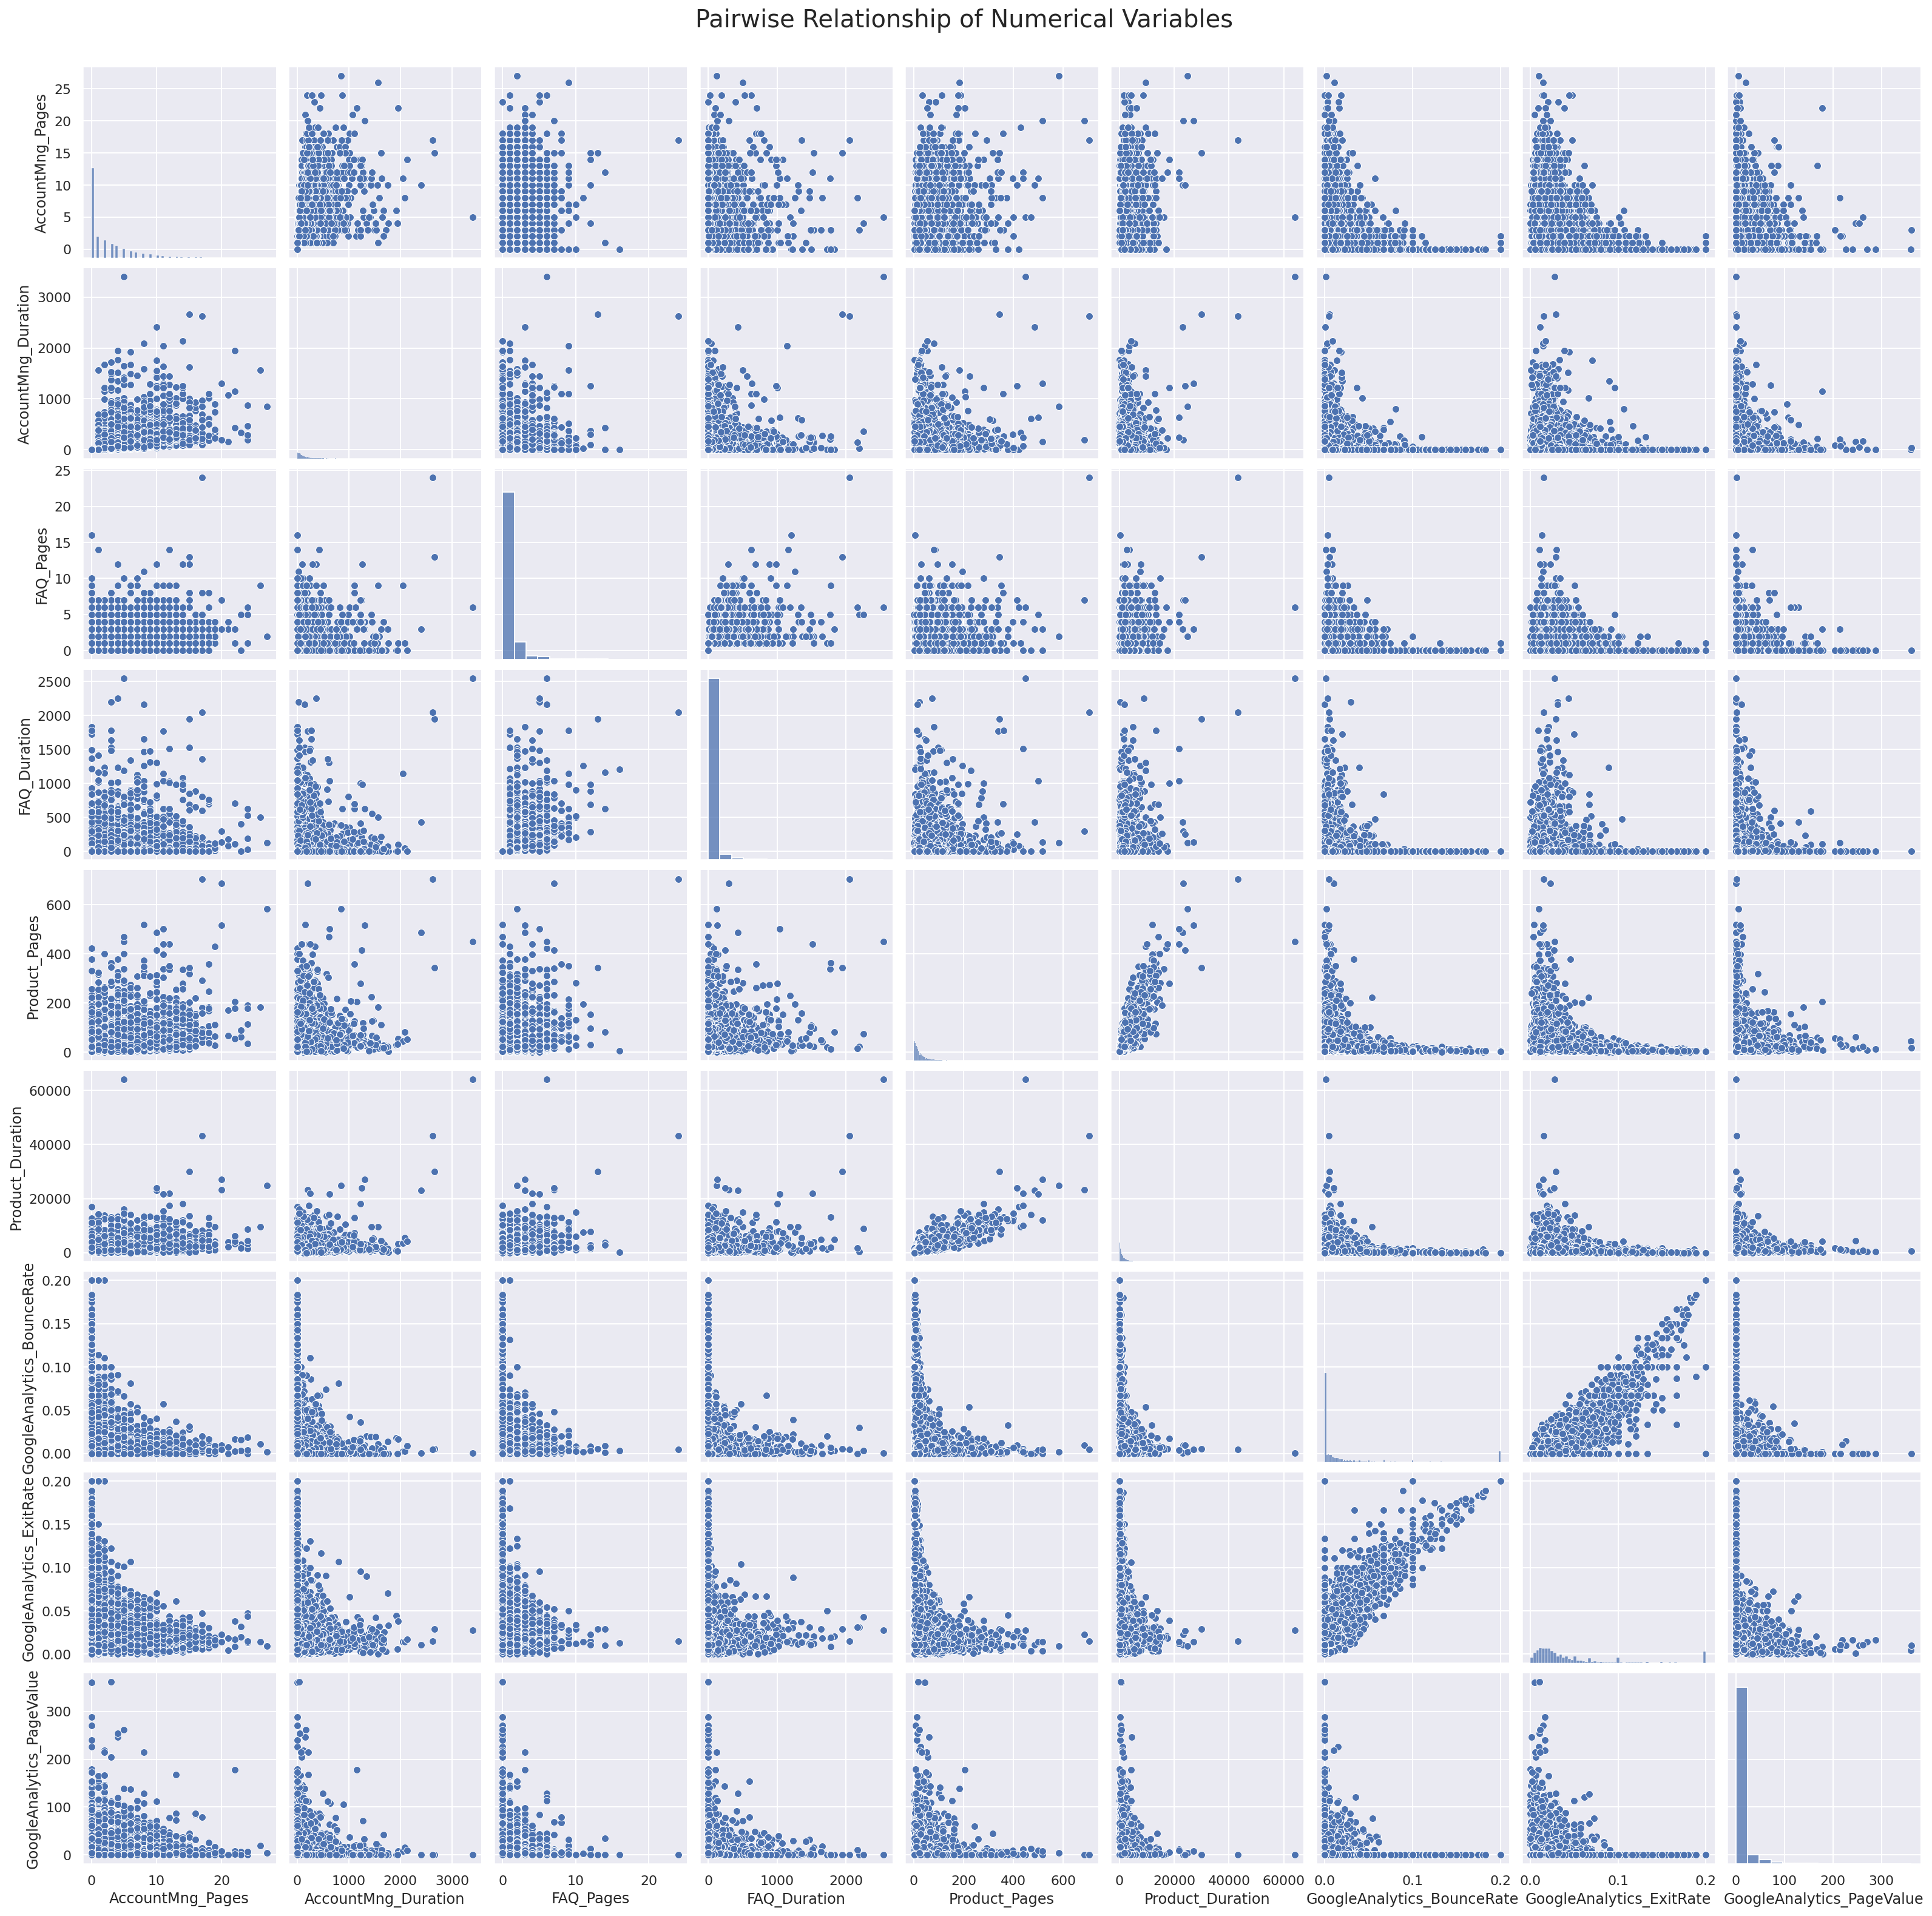

In [16]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(train[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'pairwise_relationship_of_numerical_variables.png'), dpi=200)
plt.show()

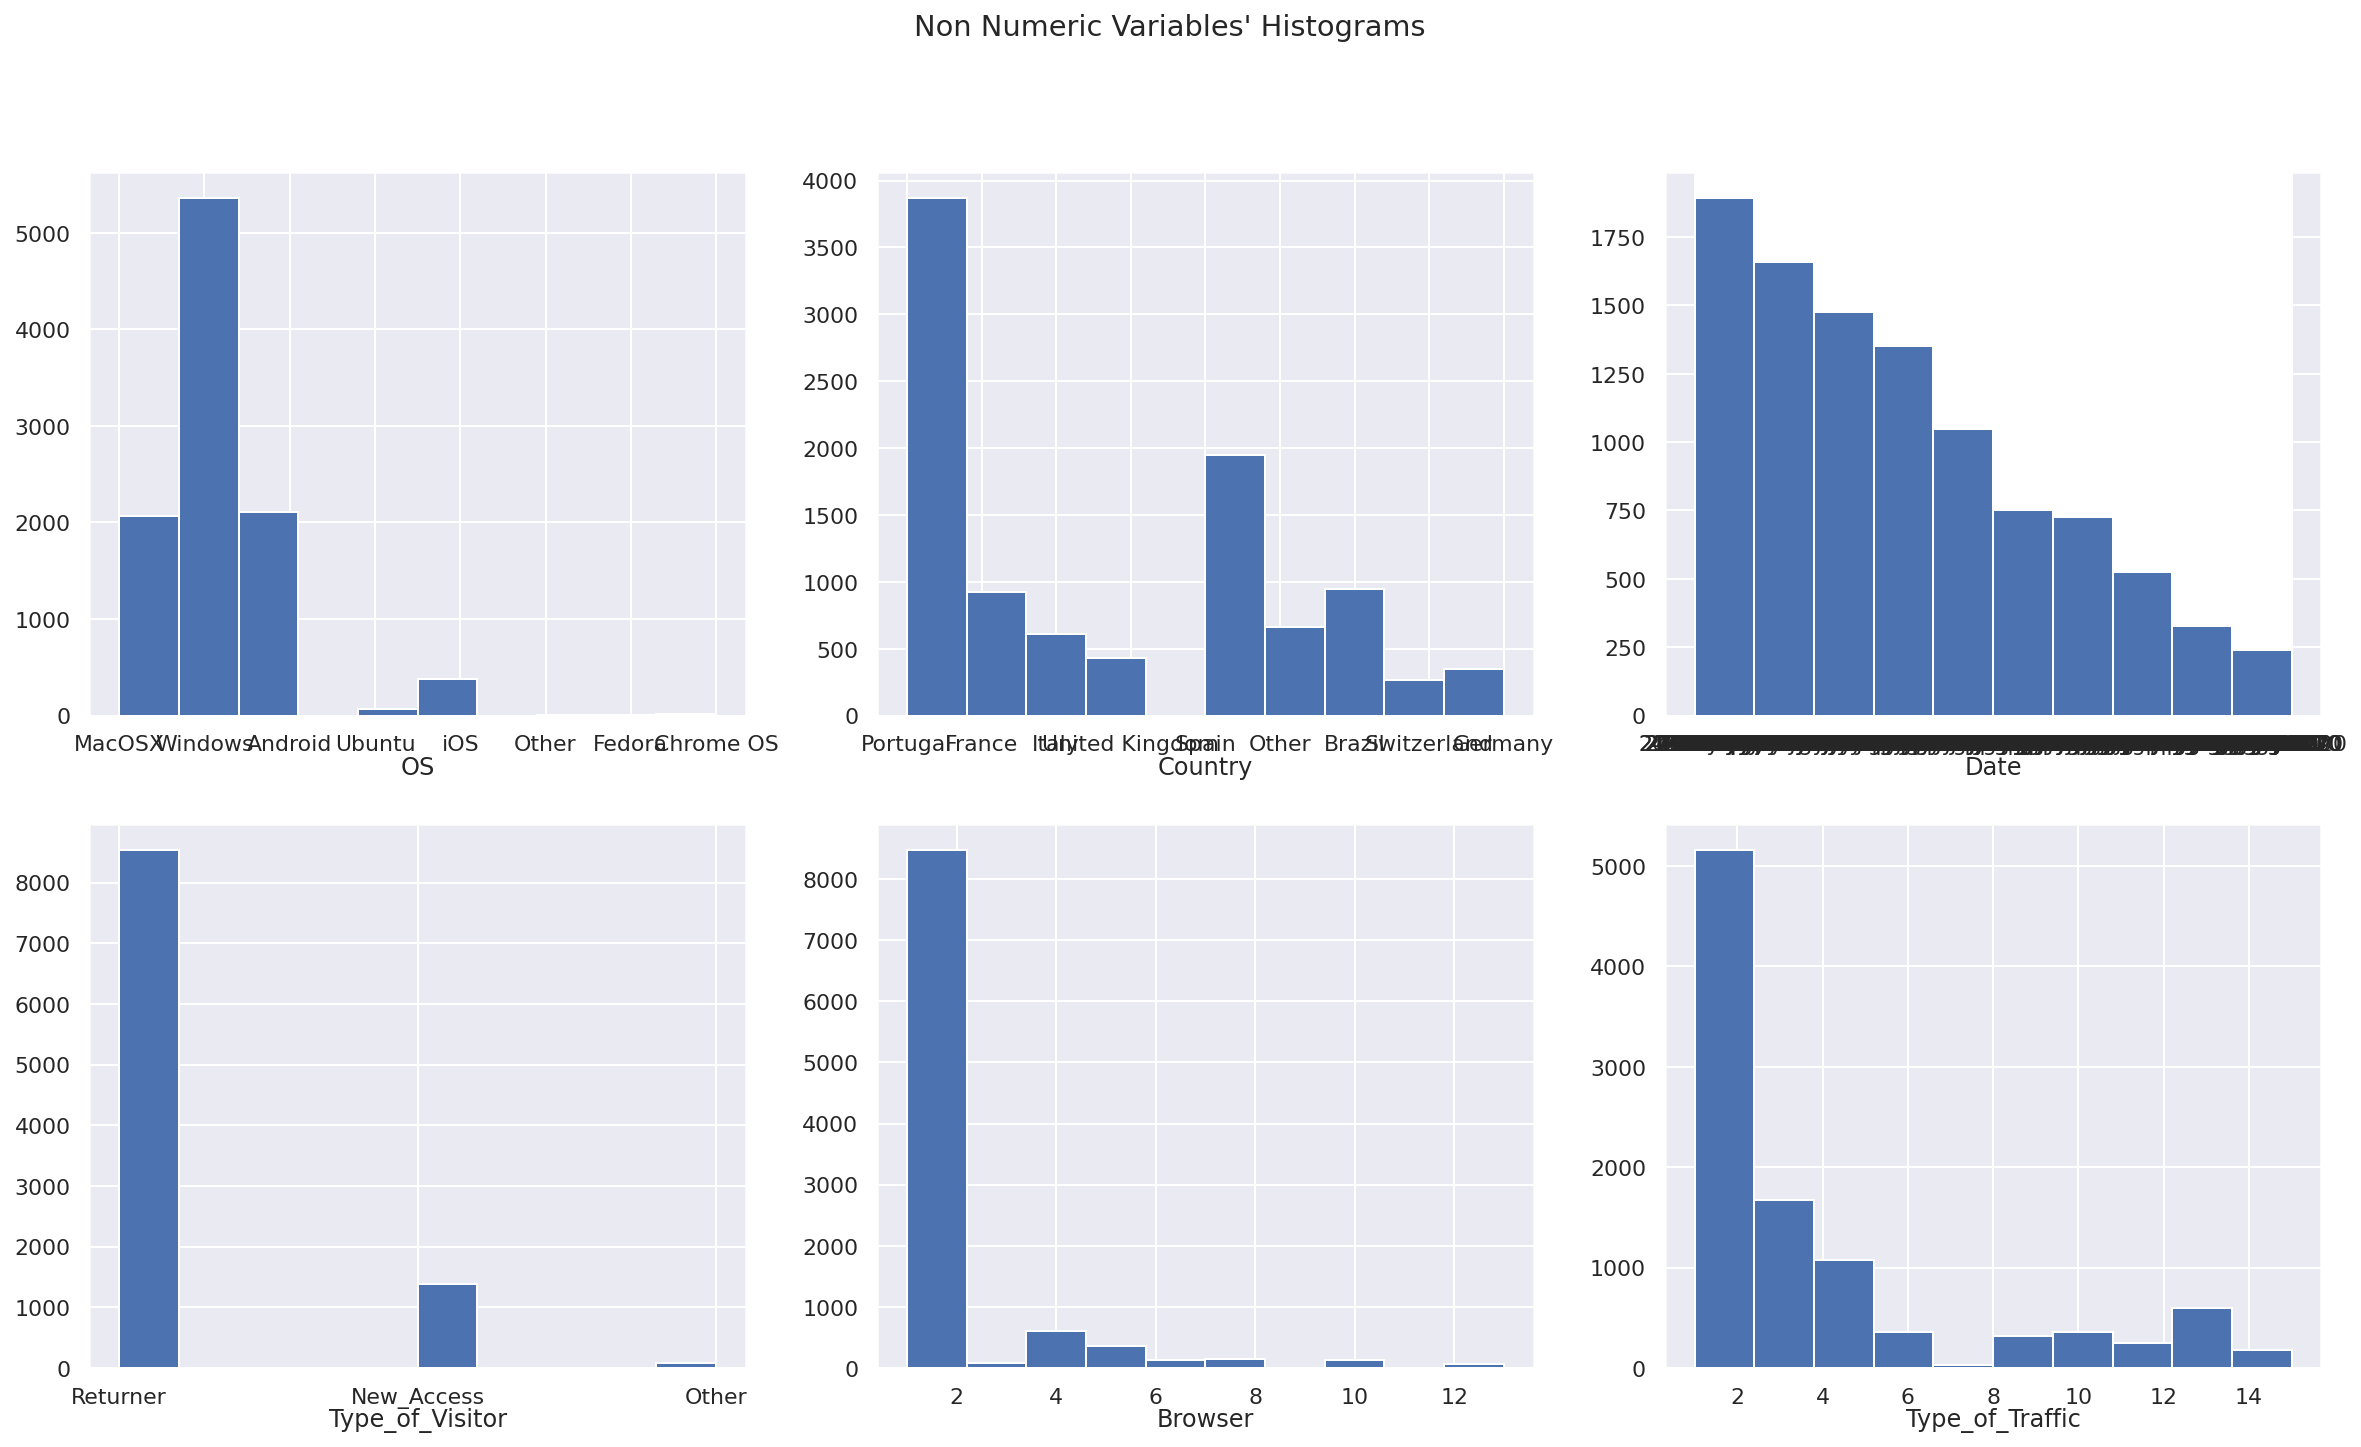

In [17]:
# All Non Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Non Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

In [18]:
# profile = ProfileReport(
#     train, 
#     title='Customer Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )
# profile.to_notebook_iframe()

## 2.4 Data Quality Verification  <a class="anchor" id="2.4"></a>

## 2.4.1 Coherence check   <a class="anchor" id="3.1"></a>
(find inconsistent values, missing values, outliers and any other problem you may find in your dataset)


A initial Data Exploration shows that:<br>

-There are no missing values;<br>
-There are no duplicated values;<br>
-There are no inconsistent values;<br>
-Some data types should be altered:
  - Date should converted to timestamp
  
-There is the possibility of ouliers, we must check and remove them through:
  - Manual visual inspection
  - IQR
  - Z-score

## 2.4.2 Data editing   <a class="anchor" id="3.1"></a>
(fix inconsistent values)

### 2.4.2.1 Fix wrong data types  <a class="anchor" id="3.1"></a>

In [19]:
data['Timestamp'] = pd.to_datetime(data['Date']).astype('int64') // 10**9
metric_features.append('Timestamp')
non_metric_features.remove('Date')
data.drop(columns=["Date"], inplace=True)

data.dtypes

Access_ID                       int64
AccountMng_Pages                int64
AccountMng_Duration           float64
FAQ_Pages                       int64
FAQ_Duration                  float64
Product_Pages                   int64
Product_Duration              float64
GoogleAnalytics_BounceRate    float64
GoogleAnalytics_ExitRate      float64
GoogleAnalytics_PageValue     float64
OS                             object
Browser                         int64
Country                        object
Type_of_Traffic                 int64
Type_of_Visitor                object
Buy                           float64
Split                          object
Timestamp                       int64
dtype: object

### 2.4.2.2 Outliers  <a class="anchor" id="3.1"></a>

In [20]:
train = data.loc[data["Split"] == "train"]
test = data.loc[data["Split"] == "test"]

###  2.4.2.2.1 Manual Inspection  <a class="anchor" id="3.1"></a>

In [21]:
#removing outliers using manual way 
filters = (
    (train['AccountMng_Pages']<=17)
    &
    (train['AccountMng_Duration']<=1000)
    &
    (train['FAQ_Pages']<=8)
    &
    (train['FAQ_Duration']<=1000)
    &
    (train['Product_Pages']<=300)
    &
    (train['Product_Duration']<=17000)
    &
    (train['GoogleAnalytics_PageValue']<=110)
    
)

train_1 = train[filters]

print('Percentage of data kept after removing outliers:', np.round(train_1.shape[0] / train.shape[0], 4))

Percentage of data kept after removing outliers: 0.9757


### 2.4.2.2 IQR  <a class="anchor" id="3.1"></a>

In [22]:
#outlier removal using IQR method
q25 = train.quantile(.25)
q75 = train.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(train[metric].between(llim, ulim, inclusive=True))

train_2 = train[np.all(filters, 0)]
print('Percentage of data kept after removing outliers:', np.round(train_2.shape[0] / train.shape[0], 4))

Percentage of data kept after removing outliers: 0.4742


### 2.4.2.3 Z-Score  <a class="anchor" id="3.1"></a>

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [23]:
z_scores = stats.zscore(train[metric_features])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 5).all(axis=1)

train_3 = train[filtered_entries]
print('Percentage of data kept after removing outliers:', np.round(train_3.shape[0] / train.shape[0], 4))

Percentage of data kept after removing outliers: 0.9652



## 2.4.3 Data cleansing  <a class="anchor" id="3.1"></a>
(drop observations - Outlier removal and removal of inconsistent values and/or features)

### 2.4.3.1 Remove Outliers  <a class="anchor" id="3.1"></a>

In [24]:
#train = train_3

frames = [train, test]
data = pd.concat(frames)

## 2.4.4 Data wrangling  <a class="anchor" id="3.1"></a> 
(feature extraction/engineering and transformation)

### 2.4.4.1 MinMax scaler <a class="anchor" id="2.4.4.1"></a>

In [25]:
data_minmax = data.copy()

In [26]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(data_minmax[metric_features])
scaled_feat

array([[0.        , 0.        , 0.        , ..., 0.3335    , 0.        ,
        0.14670659],
       [0.        , 0.        , 0.        , ..., 0.2245    , 0.        ,
        0.32634731],
       [0.        , 0.        , 0.        , ..., 0.2915    , 0.        ,
        0.91916168],
       ...,
       [0.08695652, 0.01672487, 0.        , ..., 0.125     , 0.03732471,
        0.88323353],
       [0.34782609, 0.0612755 , 0.        , ..., 0.25      , 0.        ,
        0.8742515 ],
       [0.04347826, 0.03933101, 0.        , ..., 0.1835    , 0.        ,
        0.32035928]])

In [27]:
print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

Parameters fitted:
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5805152e+09] 
 [2.30000000e+01 2.72050000e+03 1.20000000e+01 2.25203330e+03
 5.34000000e+02 1.85041262e+04 2.00000000e-01 2.00000000e-01
 2.58549900e+02 1.60937280e+09]


In [28]:
data_minmax[metric_features] = scaled_feat
data_minmax.head()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,Split,Timestamp
0,102863333,0.0,0.0,0.000000,0.000000,0.005618,0.003459,0.0000,0.3335,0.000000,MacOSX,2,Portugal,1,Returner,0.0,train,0.146707
1,103117814,0.0,0.0,0.000000,0.000000,0.043071,0.036992,0.1085,0.2245,0.000000,Windows,2,France,6,Returner,0.0,train,0.326347
2,103201891,0.0,0.0,0.000000,0.000000,0.014981,0.005134,0.1250,0.2915,0.000000,Windows,4,Italy,1,Returner,0.0,train,0.919162
3,103226087,0.0,0.0,0.000000,0.000000,0.016854,0.032898,0.0000,0.1250,0.164079,Windows,2,United Kingdom,2,Returner,1.0,train,0.973054
4,103234445,0.0,0.0,0.166667,0.171401,0.067416,0.087004,0.0000,0.0465,0.048359,Windows,2,Spain,3,Returner,1.0,train,0.889222


In [29]:
data_minmax[metric_features].describe().round(2)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Timestamp
count,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00
mean,0.10,0.03,0.04,0.01,0.05,0.06,0.11,0.22,0.02,0.55
std,0.14,0.05,0.09,0.04,0.07,0.08,0.25,0.25,0.06,0.31
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.07,0.00,0.30
50%,0.04,0.00,0.00,0.00,0.03,0.03,0.02,0.13,0.00,0.53
75%,0.13,0.03,0.00,0.00,0.07,0.08,0.09,0.25,0.00,0.87
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### 2.4.4.2 Standard scaler <a class="anchor" id="2.4.4.2"></a>

In [30]:
data_standard = data.copy()

In [31]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(data_standard[metric_features])
scaled_feat

array([[-0.70030555, -0.52501635, -0.40565201, ...,  0.46763635,
        -0.34880803, -1.30695954],
       [-0.70030555, -0.52501635, -0.40565201, ...,  0.02342231,
        -0.34880803, -0.73053033],
       [-0.70030555, -0.52501635, -0.40565201, ...,  0.29647131,
        -0.34880803,  1.17168606],
       ...,
       [-0.0598593 , -0.18365447, -0.40565201, ..., -0.38207582,
         0.31860835,  1.05640021],
       [ 1.86147947,  0.72564356, -0.40565201, ...,  0.12734394,
        -0.34880803,  1.02757875],
       [-0.38008242,  0.27774676, -0.40565201, ..., -0.14366737,
        -0.34880803, -0.74974463]])

In [32]:
print("Parameters fitted:\n", scaler.mean_, "\n", scaler.var_)

Parameters fitted:
 [2.18692996e+00 6.99792366e+01 4.25738432e-01 2.35195741e+01
 2.91602376e+01 1.07912193e+03 2.26678270e-02 4.37505397e-02
 5.04348144e+00 1.59650268e+09] 
 [9.75202062e+00 1.77661262e+04 1.10148463e+00 8.33565757e+03
 1.30008335e+03 2.09925163e+06 2.40927181e-03 2.40839895e-03
 2.09068159e+02 8.08794203e+13]


In [33]:
data_standard[metric_features] = scaled_feat
data_standard.head()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,Split,Timestamp
0,102863333,-0.700306,-0.525016,-0.405652,-0.257608,-0.725531,-0.700626,-0.461814,0.467636,-0.348808,MacOSX,2,Portugal,1,Returner,0.0,train,-1.306960
1,103117814,-0.700306,-0.525016,-0.405652,-0.257608,-0.170849,-0.272364,-0.019718,0.023422,-0.348808,Windows,2,France,6,Returner,0.0,train,-0.730530
2,103201891,-0.700306,-0.525016,-0.405652,-0.257608,-0.586861,-0.679230,0.047514,0.296471,-0.348808,Windows,4,Italy,1,Returner,0.0,train,1.171686
3,103226087,-0.700306,-0.525016,-0.405652,-0.257608,-0.559126,-0.324645,-0.461814,-0.382076,2.585139,Windows,2,United Kingdom,2,Returner,1.0,train,1.344615
4,103234445,-0.700306,-0.525016,1.499988,3.970220,0.189695,0.366364,-0.461814,-0.701991,0.515922,Windows,2,Spain,3,Returner,1.0,train,1.075615


In [34]:
data_standard[metric_features].describe().round(2)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Timestamp
count,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.70,-0.53,-0.41,-0.26,-0.81,-0.74,-0.46,-0.89,-0.35,-1.78
25%,-0.70,-0.53,-0.41,-0.26,-0.61,-0.62,-0.46,-0.60,-0.35,-0.83
50%,-0.38,-0.49,-0.41,-0.26,-0.34,-0.35,-0.40,-0.37,-0.35,-0.09
75%,0.26,0.14,-0.41,-0.26,0.22,0.21,-0.11,0.13,-0.35,1.00
max,6.66,19.89,11.03,24.41,14.00,12.03,3.61,3.18,17.53,1.43


### 2.4.4.3 Robust scaler <a class="anchor" id="2.4.4.3"></a>

In [35]:
data_robust = data.copy()

In [36]:
scaler = RobustScaler()
scaled_feat = scaler.fit_transform(data_robust[metric_features])
scaled_feat

array([[-0.33333333, -0.05681818,  0.        , ...,  1.14565826,
         0.        , -0.66842105],
       [-0.33333333, -0.05681818,  0.        , ...,  0.53501401,
         0.        , -0.35263158],
       [-0.33333333, -0.05681818,  0.        , ...,  0.91036415,
         0.        ,  0.68947368],
       ...,
       [ 0.33333333,  0.46022727,  0.        , ..., -0.02240896,
         9.6503    ,  0.62631579],
       [ 2.33333333,  1.8375    ,  0.        , ...,  0.67787115,
         0.        ,  0.61052632],
       [ 0.        ,  1.15909091,  0.        , ...,  0.30532213,
         0.        , -0.36315789]])

In [37]:
print("Parameters fitted:\n", scaler.center_, "\n", scaler.scale_)

Parameters fitted:
 [1.0000000e+00 5.0000000e+00 0.0000000e+00 0.0000000e+00 1.7000000e+01
 5.7700000e+02 3.1000000e-03 2.5800000e-02 0.0000000e+00 1.5957216e+09] 
 [3.00000000e+00 8.80000000e+01 1.00000000e+00 1.00000000e+00
 3.00000000e+01 1.21048455e+03 1.75000000e-02 3.57000000e-02
 1.00000000e+00 1.64160000e+07]


In [38]:
data_robust[metric_features] = scaled_feat
data_robust.head()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,Split,Timestamp
0,102863333,-0.333333,-0.056818,0.0,0.0,-0.466667,-0.423797,-0.177143,1.145658,0.0000,MacOSX,2,Portugal,1,Returner,0.0,train,-0.668421
1,103117814,-0.333333,-0.056818,0.0,0.0,0.200000,0.088807,1.062857,0.535014,0.0000,Windows,2,France,6,Returner,0.0,train,-0.352632
2,103201891,-0.333333,-0.056818,0.0,0.0,-0.300000,-0.398188,1.251429,0.910364,0.0000,Windows,4,Italy,1,Returner,0.0,train,0.689474
3,103226087,-0.333333,-0.056818,0.0,0.0,-0.266667,0.026229,-0.177143,-0.022409,42.4225,Windows,2,United Kingdom,2,Returner,1.0,train,0.784211
4,103234445,-0.333333,-0.056818,2.0,386.0,0.633333,0.853327,-0.177143,-0.462185,12.5033,Windows,2,Spain,3,Returner,1.0,train,0.636842


In [39]:
data_robust[metric_features].describe().round(2)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Timestamp
count,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00,11951.00
mean,0.40,0.74,0.43,23.52,0.41,0.41,1.12,0.50,5.04,0.05
std,1.04,1.51,1.05,91.30,1.20,1.20,2.80,1.37,14.46,0.55
min,-0.33,-0.06,0.00,0.00,-0.57,-0.48,-0.18,-0.72,0.00,-0.93
25%,-0.33,-0.06,0.00,0.00,-0.33,-0.33,-0.18,-0.32,0.00,-0.41
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.67,0.94,0.00,0.00,0.67,0.67,0.82,0.68,0.00,0.59
max,7.33,30.86,12.00,2252.03,17.23,14.81,11.25,4.88,258.55,0.83


### 2.4.4.4 Scaler selection <a class="anchor" id="2.4.4.4"></a>

In [40]:
#data = data_minmax.copy()
#data = data_standard.copy()
data = data_robust.copy()

## 2.4.5 Data reduction <a class="anchor" id="3.1"></a>
(reducing the dimensionality of a dataset, producing summary statistics, reducing the number of records in a dataset)


15.1. Correlation's: Pearson and Spearman
15.2. Recursive Feature Elimination - RFE
15.3. LASSO Regression
15.4. RIDGE Regression
15.5. Chi-Square
15.6. Principal Components Analysis - PCA
15.7. ANOVA F-Values
15.8. Feature Importances - Tree Based Classifiers
15.9. Gini Importance | Entropy Importance
15.10. MAE | MSE | FRIEDMAN Importances
15.11. AdaBoost Feature Importances

## 2.4.6 Redo data exploration <a class="anchor" id="3.1"></a>
Check if the data looks the way you expect it to.

Have you missed some outliers?
Are there still missing values?
Is the data normalized?

# 3.Feature Selection  <a class="anchor" id="2"></a>

In [41]:
X_train = data.loc[data["Split"] == "train"][metric_features]
X_test = data.loc[data["Split"] == "test"][metric_features]

X_train_nm = data.loc[data["Split"] == "train"][non_metric_features]
X_test_nm = data.loc[data["Split"] == "test"][non_metric_features]

y_train = data.loc[data["Split"] == "train"]['Buy'].astype(bool)
y_test = data.loc[data["Split"] == "test"]['Buy'].astype(bool)

## 3.1 Correlation's: Pearson and Spearman <a class="anchor" id="3.1"></a>

In [42]:
def plot_corr(corr, caption):

    # Prepare figure
    fig = plt.figure(figsize=(10, 8))

    # Build annotation matrix (values above |0.5| will appear annotated in the plot)
    mask_annot = np.absolute(corr.values) >= 0.5
    annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

    # Plot heatmap of the correlation matrix
    sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

    # Layout
    fig.subplots_adjust(top=0.95)
    fig.suptitle(caption, fontsize=20)

    plt.show()

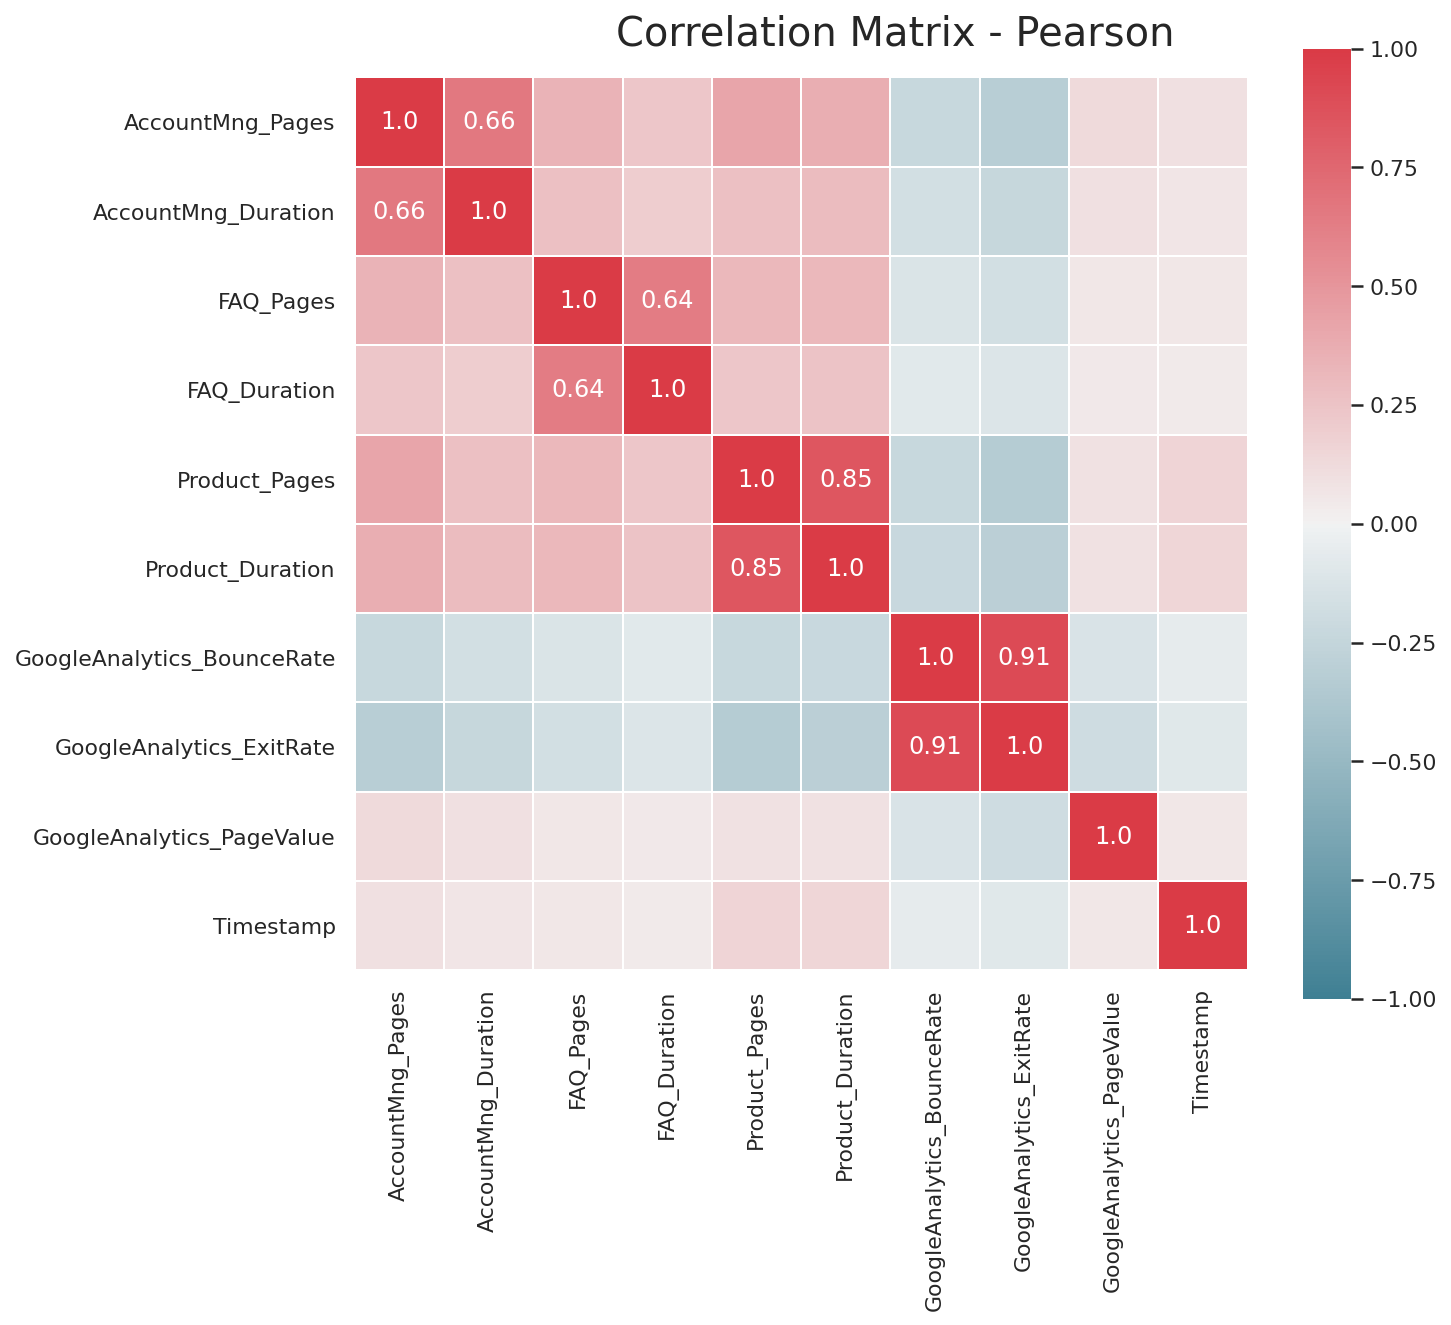

In [43]:
# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr_pearson = np.round(data[metric_features].corr(method="pearson"), decimals=2)
plot_corr(corr_pearson, "Correlation Matrix - Pearson")

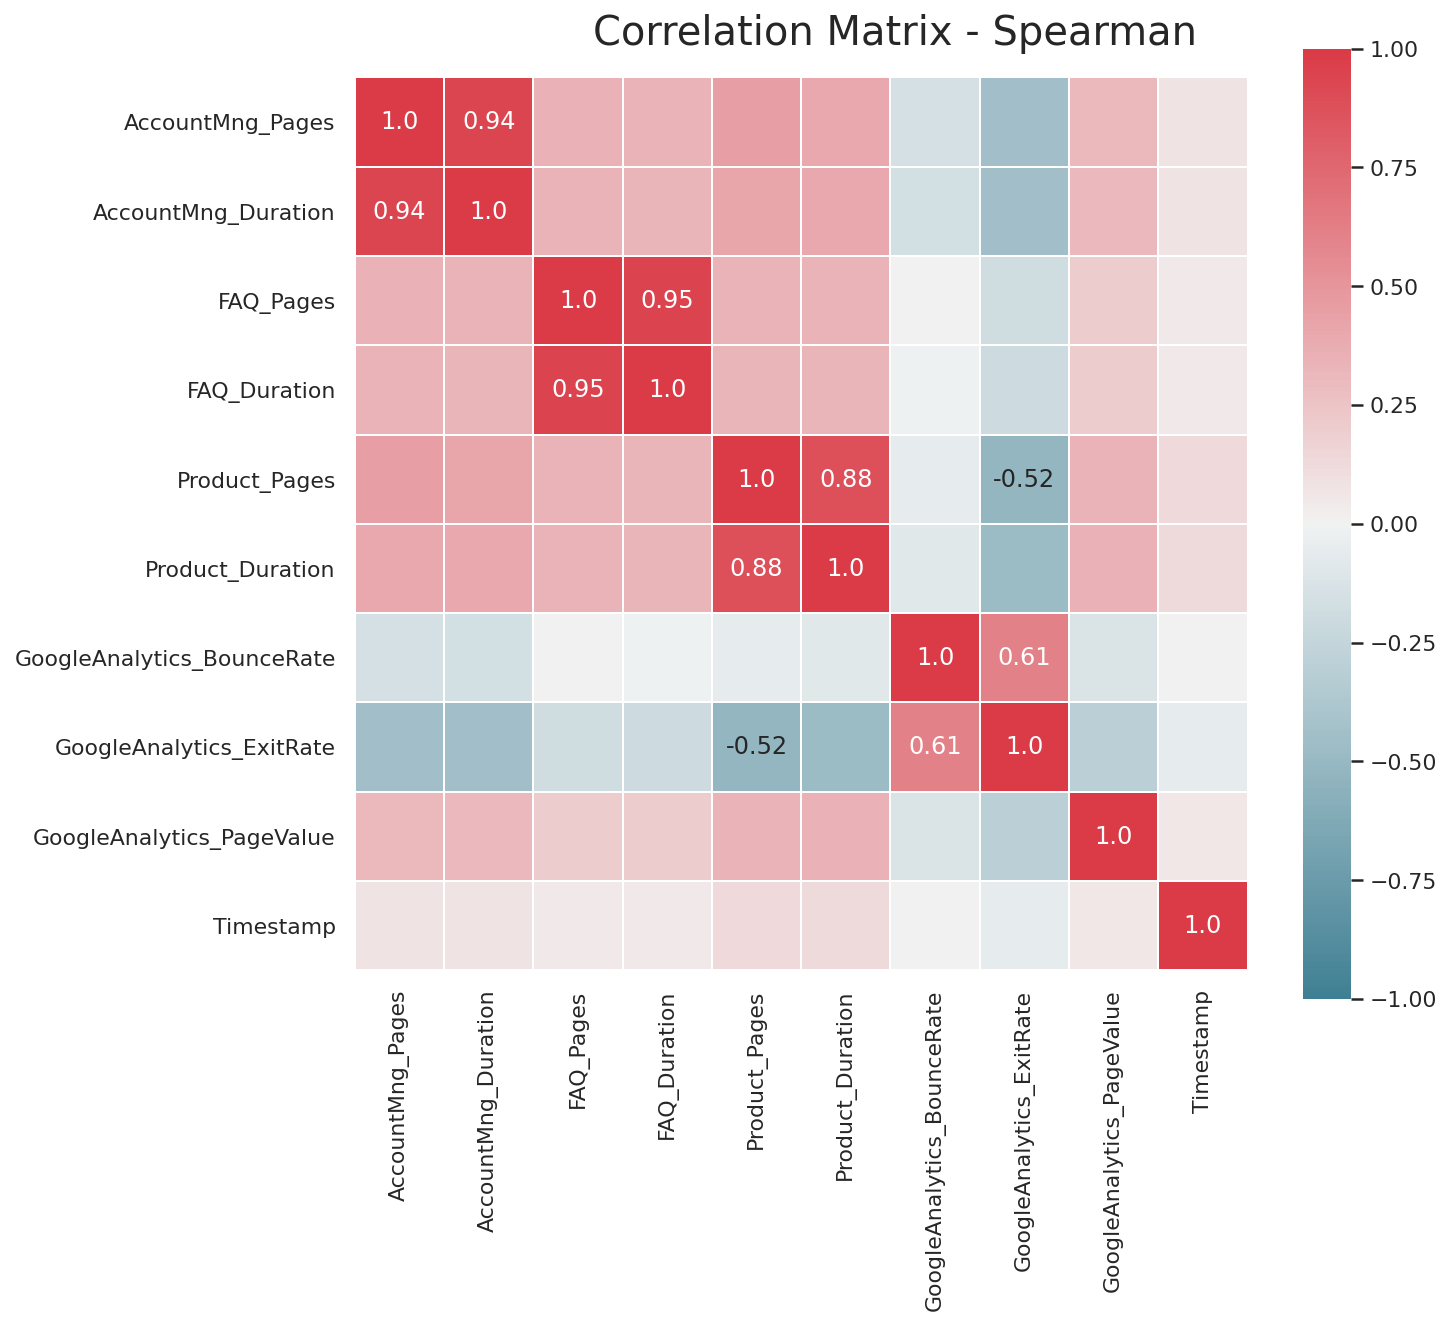

In [44]:
# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr_spearman = np.round(data[metric_features].corr(method="spearman"), decimals=2)
plot_corr(corr_spearman, "Correlation Matrix - Spearman")

## 3.2 Recursive Feature Elimination - RFE <a class="anchor" id="3.2"></a>

In [45]:
# create a Logistic Regression Classifier instance called model
model = LogisticRegression()

In [46]:
# create a RFE instance 
rfe = RFE(estimator = model, n_features_to_select = 6)

In [47]:
scaler = MinMaxScaler().fit(X_train)

In [48]:
#scaling the training into values between 0 and 1
X_train_scaled = scaler.transform(X_train) # this will return an array
# Convert the array to a pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns).set_index(X_train.index)
X_train_scaled.head(3)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Timestamp
0,0.0,0.0,0.0,0.0,0.011811,0.005879,0.0000,0.3335,0.0,0.146707
1,0.0,0.0,0.0,0.0,0.090551,0.062874,0.1085,0.2245,0.0,0.326347
2,0.0,0.0,0.0,0.0,0.031496,0.008726,0.1250,0.2915,0.0,0.919162


In [49]:
# Check if any of the numerical variables is univariate (variance is equal to 0). Drop those variables if existent.
X_train_scaled.var()

AccountMng_Pages              0.026466
AccountMng_Duration           0.016313
FAQ_Pages                     0.027780
FAQ_Duration                  0.010007
Product_Pages                 0.017723
Product_Duration              0.016086
GoogleAnalytics_BounceRate    0.061310
GoogleAnalytics_ExitRate      0.061096
GoogleAnalytics_PageValue     0.019090
Timestamp                     0.097423
dtype: float64

In [50]:
# Transform the data using RFE by applying the method fit_transform() to the instance rfe
X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)

In [51]:
# Check the variables that were selected by RFE as the most "important" ones by calling the attribute support_ to rfe
X_train_scaled.columns

Index(['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Timestamp'],
      dtype='object')

In [52]:
#
rfe.support_

array([False, False, False, False,  True,  True,  True,  True,  True,
        True])

In [53]:
#Check the ranking of the variables defined by RFE as the most "important" ones by applying the attribute ranking_ to rfe
rfe.ranking_

array([5, 3, 4, 2, 1, 1, 1, 1, 1, 1])

In [54]:
#Create an object (pandas Series) that will have as index the X_train_num columns names and the support_ attribute as value
selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
selected_features

AccountMng_Pages              False
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                  True
Product_Duration               True
GoogleAnalytics_BounceRate     True
GoogleAnalytics_ExitRate       True
GoogleAnalytics_PageValue      True
Timestamp                      True
dtype: bool

## 3.3 LASSO Regression <a class="anchor" id="3.3"></a>

In [55]:
# define model
model = LassoCV()

# fit model
model.fit(X_train, y_train)

weights = list(zip(abs(model.coef_), X_train.columns.to_list()))
weights = sorted(weights, key=lambda x: x[0], reverse=True)

for feature in weights:
    print(feature)

(0.03556318132101461, 'Timestamp')
(0.016448452267574683, 'Product_Duration')
(0.014064264517999026, 'GoogleAnalytics_ExitRate')
(0.013859142790397896, 'GoogleAnalytics_PageValue')
(0.010774630040962048, 'Product_Pages')
(0.0024910093880173008, 'AccountMng_Duration')
(0.00011292311978412898, 'FAQ_Duration')
(0.0, 'AccountMng_Pages')
(0.0, 'FAQ_Pages')
(0.0, 'GoogleAnalytics_BounceRate')


## 3.4 RIDGE Regression <a class="anchor" id="3.4"></a>

In [56]:
# define model
model = Ridge(alpha=1.0)

# fit model
model.fit(X_train, y_train)

weights = list(zip(abs(model.coef_), X_train.columns.to_list()))
weights = sorted(weights, key=lambda x: x[0], reverse=True)

for feature in weights:
    print(feature)

(0.04367387593844589, 'Timestamp')
(0.024652349798285126, 'GoogleAnalytics_ExitRate')
(0.017231206596382897, 'Product_Duration')
(0.013790196929424951, 'GoogleAnalytics_PageValue')
(0.010961455699350591, 'Product_Pages')
(0.004920392918814944, 'GoogleAnalytics_BounceRate')
(0.004558105996194376, 'AccountMng_Duration')
(0.0039148975801059985, 'AccountMng_Pages')
(0.0003733458054173858, 'FAQ_Pages')
(0.0001018603305597113, 'FAQ_Duration')


## 3.5 Chi-Square <a class="anchor" id="3.5"></a>

In [57]:
def TestIndependence(X, y, var, alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [58]:
for var in data[non_metric_features]:
    TestIndependence(data[non_metric_features][var], data['Buy'], var)

OS is IMPORTANT for Prediction
Country is NOT an important predictor. (Discard Country from model)
Type_of_Visitor is IMPORTANT for Prediction
Browser is IMPORTANT for Prediction
Type_of_Traffic is IMPORTANT for Prediction


## 3.10 MAE | MSE | FRIEDMAN Importances <a class="anchor" id="3.10"></a>

In [59]:
mse_importance = DecisionTreeRegressor().fit(X_train, y_train).feature_importances_
mae_importance = DecisionTreeRegressor(criterion='mae').fit(X_train, y_train).feature_importances_
friedman_importance = DecisionTreeRegressor(criterion='friedman_mse').fit(X_train, y_train).feature_importances_

In [60]:
weights = list(zip(mse_importance, mae_importance, friedman_importance, X_train.columns.to_list()))
weights = sorted(weights, key=lambda x: x[0], reverse=True)

for feature in weights:
    print(feature)

(0.43317090944656944, 0.38466947960618836, 0.43045593042670033, 'GoogleAnalytics_PageValue')
(0.09917679424502426, 0.09071729957805914, 0.09726850400951612, 'Timestamp')
(0.09910268801626962, 0.10478199718706055, 0.10723157472737907, 'Product_Duration')
(0.08622672627330888, 0.0590717299578059, 0.08217895930289242, 'GoogleAnalytics_BounceRate')
(0.07192001792937457, 0.0872011251758087, 0.07438169412244466, 'GoogleAnalytics_ExitRate')
(0.06858990745902988, 0.08649789029535865, 0.06496648644725134, 'Product_Pages')
(0.057167267234216036, 0.07383966244725741, 0.0595780623492303, 'AccountMng_Duration')
(0.04415262409803977, 0.05414908579465536, 0.04478800236275194, 'AccountMng_Pages')
(0.024131870599838717, 0.0379746835443038, 0.025815627941672383, 'FAQ_Duration')
(0.01636119469832893, 0.021097046413502057, 0.01333515831016152, 'FAQ_Pages')


In [61]:
# tidy = zippy.melt(id_vars='col').rename(columns=str.title)
# tidy.sort_values(['Value'], ascending = False, inplace = True)

# plt.figure(figsize=(15,20))
# sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

## 3.11 AdaBoost Feature Importances <a class="anchor" id="3.11"></a>

In [62]:
ab = AdaBoostClassifier(random_state = 5).fit(X_train, y_train)

/home/bitseybloom/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='importances', ylabel='features'>

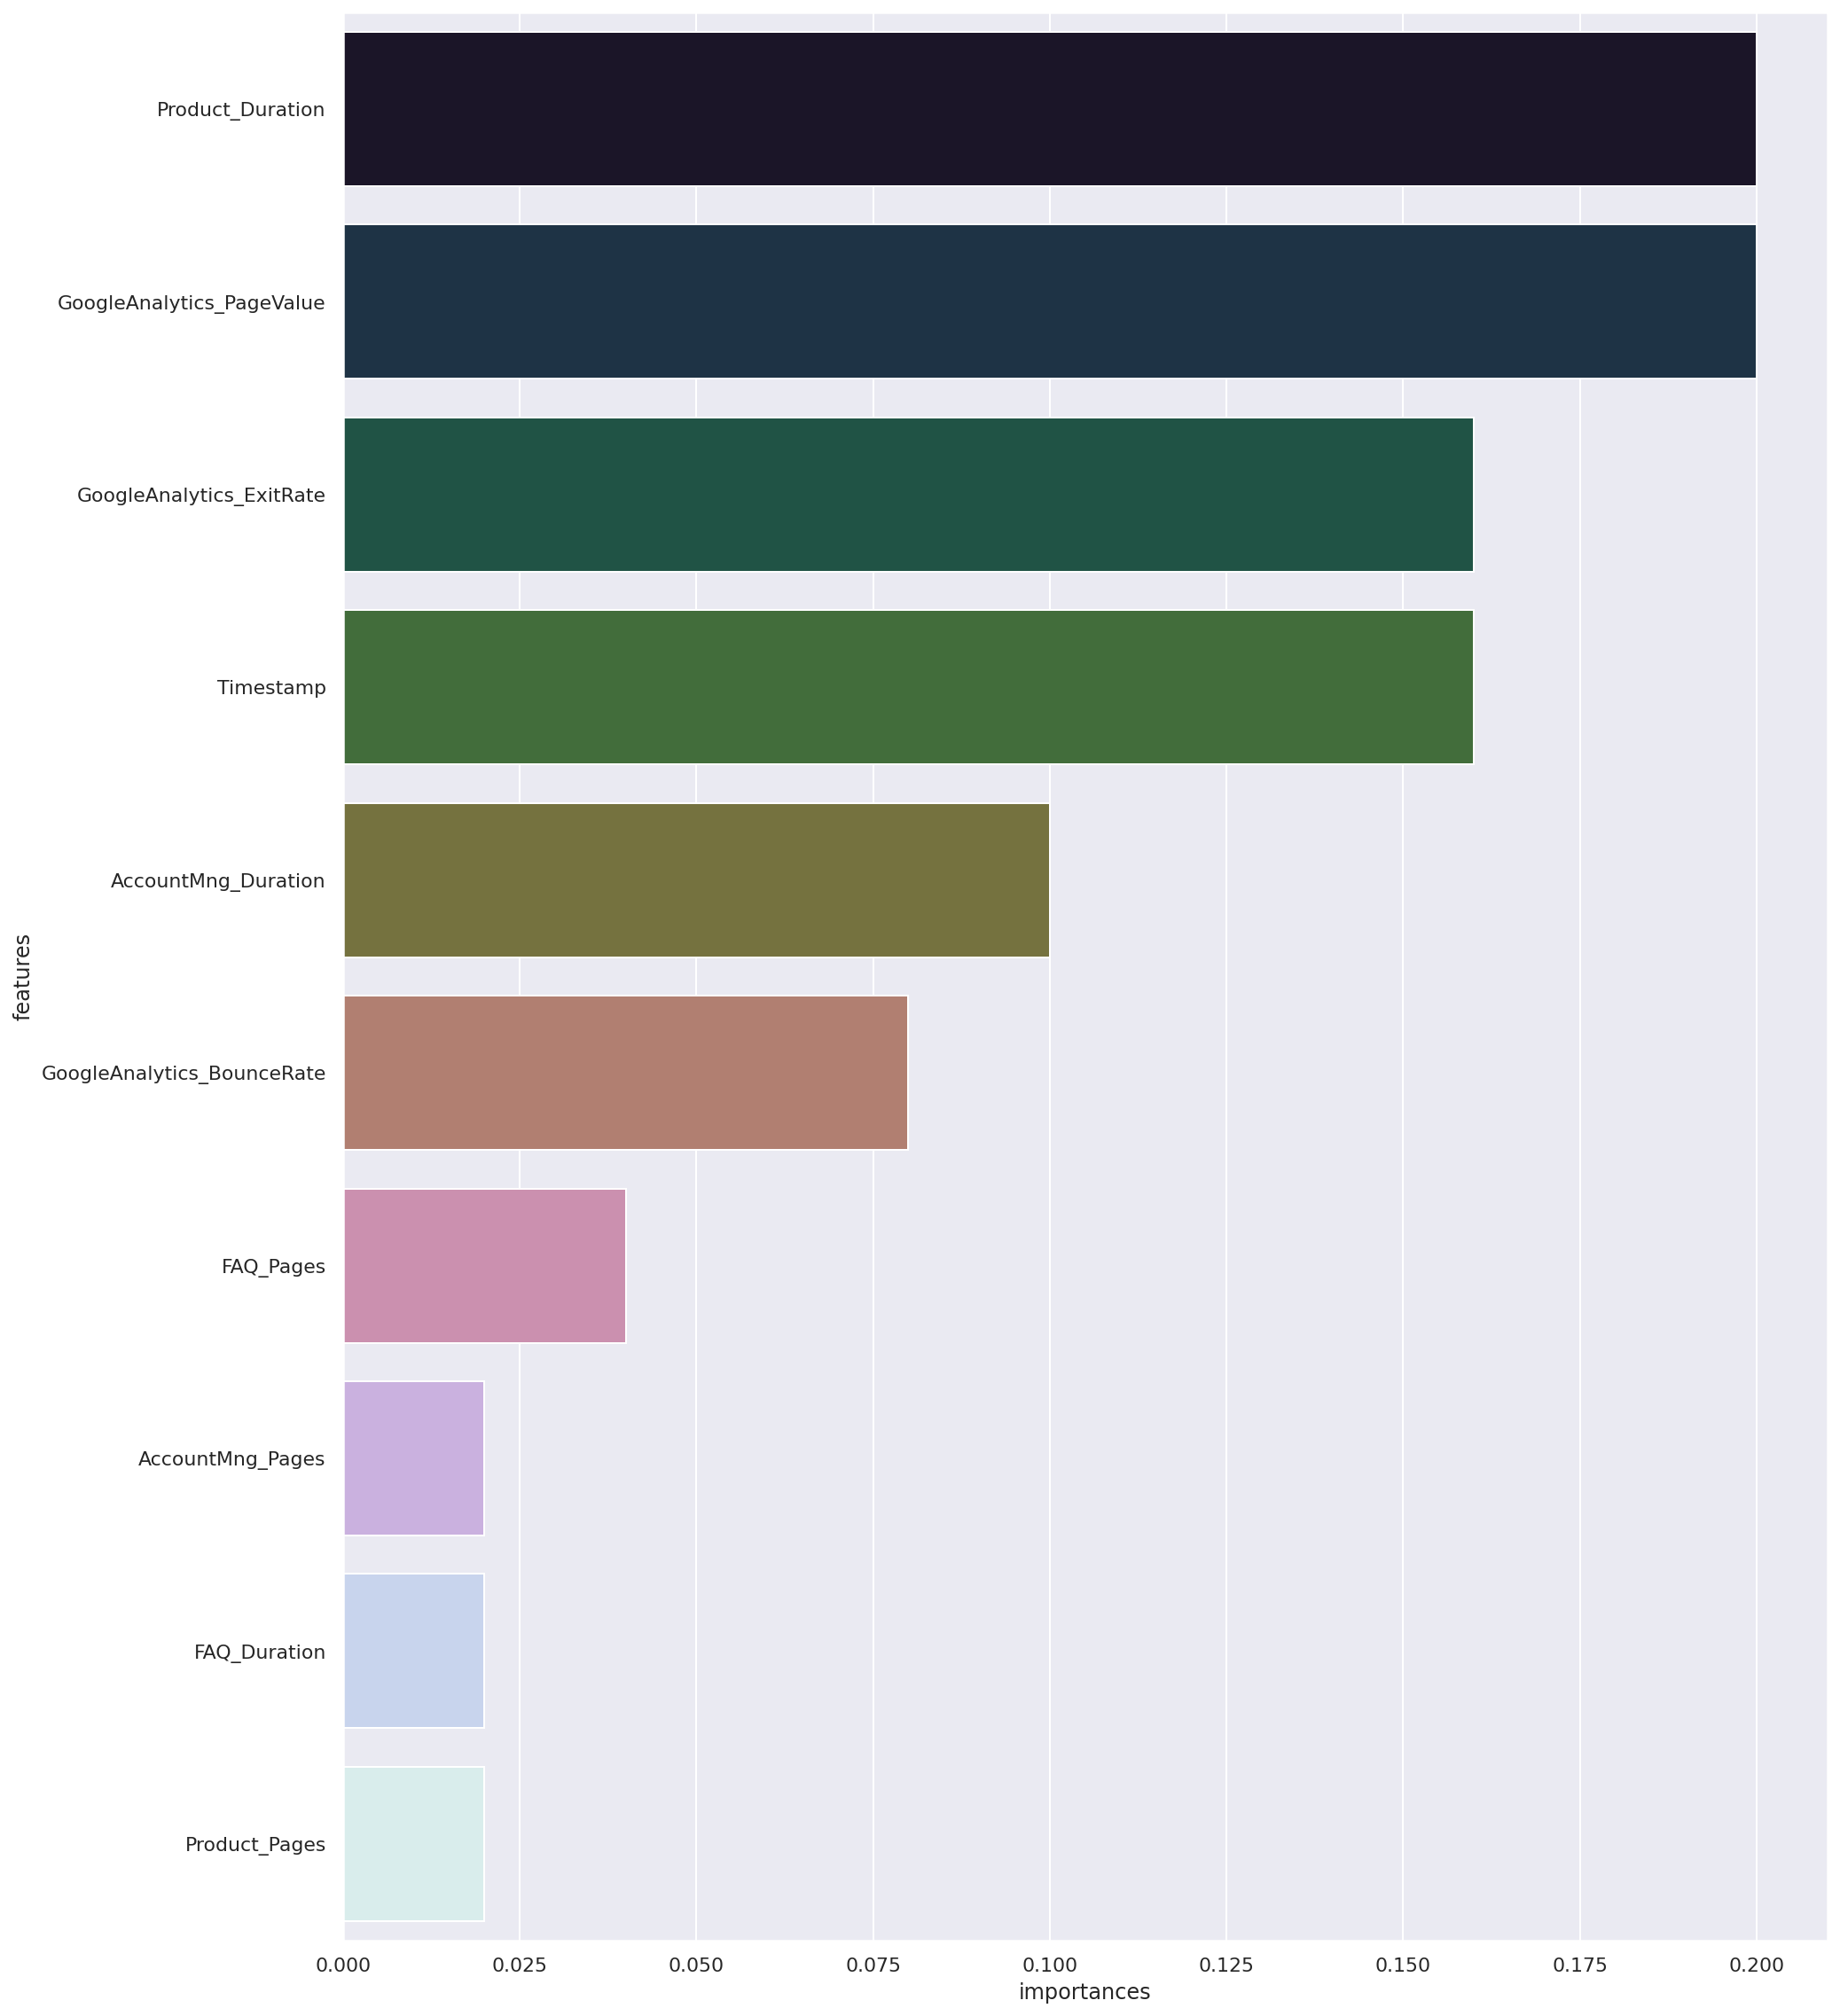

In [63]:
plt.figure(figsize=(15,20))
importances = ab.feature_importances_
features = X_train.columns
data_tuples = list(zip(importances, features))
data_1 = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data_1 = data_1.sort_values('importances', ascending = False)
sns.barplot(data_1['importances'], data_1['features'], palette = 'cubehelix', orient = 'h')

# 4.Final Selected features  <a class="anchor" id="2"></a>

Split into X (Input variables) and y (Target)

### 4.1.1 Selecting features <a class="anchor" id="4.1.1"></a>

In [64]:
metric_features = [
    #"AccountMng_Pages", #
    "AccountMng_Duration",
    #"FAQ_Pages", #
    "FAQ_Duration",
    #"Product_Pages", #
    "Product_Duration",
    #"GoogleAnalytics_BounceRate", #
    "GoogleAnalytics_ExitRate",
    "GoogleAnalytics_PageValue",
    #"Timestamp" #
]

non_metric_features = [
    "OS",
    #"Country", #
    "Type_of_Visitor",
    "Browser",
    "Type_of_Traffic"
]

columns = []
columns.extend(metric_features)
columns.extend(non_metric_features)
columns.append("Split")
columns.append("Buy")
columns.append("Access_ID")

data_reduced = data[columns]


### 4.2.1 One-hot encoding <a class="anchor" id="4.2.1"></a>

In [65]:
data_ohc = data_reduced.copy()
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(data_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
ohc_data = pd.DataFrame(ohc_feat, index=data_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_data.head()

,x0_Chrome OS,x0_Fedora,x0_MacOSX,x0_Other,x0_Ubuntu,x0_Windows,x0_iOS,x1_France,x1_Germany,x1_Italy,...,x4_6,x4_7,x4_8,x4_9,x4_10,x4_11,x4_12,x4_13,x4_14,x4_15
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
ohc_data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
x0_Chrome OS,11951.0,0.001590,0.039843,0.0,0.0,0.0,0.0,1.0
x0_Fedora,11951.0,0.000418,0.020451,0.0,0.0,0.0,0.0,1.0
x0_MacOSX,11951.0,0.208936,0.406566,0.0,0.0,0.0,0.0,1.0
x0_Other,11951.0,0.000586,0.024196,0.0,0.0,0.0,0.0,1.0
x0_Ubuntu,11951.0,0.006025,0.077387,0.0,0.0,0.0,0.0,1.0
x0_Windows,11951.0,0.531922,0.499001,0.0,0.0,1.0,1.0,1.0
x0_iOS,11951.0,0.038825,0.193186,0.0,0.0,0.0,0.0,1.0
x1_France,11951.0,0.092461,0.289688,0.0,0.0,0.0,0.0,1.0
x1_Germany,11951.0,0.035897,0.186040,0.0,0.0,0.0,0.0,1.0
x1_Italy,11951.0,0.061920,0.241019,0.0,0.0,0.0,0.0,1.0


In [67]:
data_ohc = pd.concat([data_ohc.drop(columns=non_metric_features), ohc_data], axis=1)
data_reduced = data_ohc.copy()
data_reduced.head().T

,0,1,2,3,4
AccountMng_Pages,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333
AccountMng_Duration,-0.056818,-0.056818,-0.056818,-0.056818,-0.056818
FAQ_Pages,0.0,0.0,0.0,0.0,2.0
FAQ_Duration,0.0,0.0,0.0,0.0,386.0
Product_Pages,-0.466667,0.2,-0.3,-0.266667,0.633333
Product_Duration,-0.423797,0.088807,-0.398188,0.026229,0.853327
GoogleAnalytics_BounceRate,-0.177143,1.062857,1.251429,-0.177143,-0.177143
GoogleAnalytics_ExitRate,1.145658,0.535014,0.910364,-0.022409,-0.462185
GoogleAnalytics_PageValue,0.0,0.0,0.0,42.4225,12.5033
Timestamp,-0.668421,-0.352632,0.689474,0.784211,0.636842


### 4.3.1 Dropping non-features <a class="anchor" id="4.3.1"></a>

In [68]:
non_features = [column for column in data_reduced.columns if (column not in metric_features) and (column not in non_metric_features) and (column not in ohc_feat_names)]

X = data_reduced.drop(columns=non_features)
X_train = data_reduced.loc[data_reduced["Split"] == "train"].drop(columns=non_features)
X_test = data_reduced.loc[data_reduced["Split"] == "test"].drop(columns=non_features)
IDs_test = data_reduced.loc[data_reduced["Split"] == "test"]["Access_ID"]

y = data_reduced["Buy"].astype(bool)
y_train = data_reduced.loc[data_reduced["Split"] == "train"]["Buy"].astype(bool)

In [69]:
X_test.head().T

,0,1,2,3,4
AccountMng_Pages,-0.333333,0.333333,-0.333333,-0.333333,3.666667
AccountMng_Duration,-0.056818,0.369318,-0.056818,-0.056818,2.502841
FAQ_Pages,0.000000,0.000000,0.000000,0.000000,1.000000
FAQ_Duration,0.000000,0.000000,0.000000,0.000000,0.000000
Product_Pages,2.300000,1.266667,0.633333,-0.500000,3.733333
Product_Duration,3.928632,0.696806,0.174723,0.092525,2.304896
GoogleAnalytics_BounceRate,0.617143,-0.108571,-0.177143,-0.177143,-0.097143
GoogleAnalytics_ExitRate,1.109244,-0.560224,-0.022409,2.078431,-0.204482
GoogleAnalytics_PageValue,0.000000,0.000000,0.000000,0.000000,1.035300
Timestamp,0.152632,-0.326316,0.521053,-0.384211,0.536842


# 5. Re-Sampling Techniques for Imbalanced Classification <a class="anchor" id="2"></a>

Re-sampling Techniques for Imbalanced Classification
 Undersampling
 Oversampling
 Undersampling & Oversampling (Combined)
SMOTE - Synthetic Minority Oversampling Technique
ADASYN - Adaptive Synthetic Oversampling
Train Test Split

In [70]:
def avg_score(model, resampler, X, y):
    # apply kfold
    skf = StratifiedKFold(n_splits=20, shuffle=True, random_staate=42)
    # create lists to store the results from the different models 
    scores_train = []
    precisions_train = []
    recalls_train = []
    f1s_train = []
    scores_test = []
    precisions_test = []
    recalls_test = []
    f1s_test = []
    timers = []
    for train_index, test_index in skf.split(X,y):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # resample the train
        if resampler is not None:
            X_train_r, y_train_r = resampler.fit_resample(X_train, y_train)
        else:
            X_train_r, y_train_r = X_train, y_train
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train_r, y_train_r)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        score_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        score_test = model.score(X_test, y_test)
        # calculate the metrics
        (precision_train, recall_train, f1_train, _) = precision_recall_fscore_support(y_train, model.predict(X_train), average='binary')
        (precision_test, recall_test, f1_test, _) = precision_recall_fscore_support(y_test, model.predict(X_test), average='binary')
        # append the accuracies, the time and the number of iterations in the corresponding list
        scores_train.append(score_train)
        precisions_train.append(precision_train)
        recalls_train.append(recall_train)
        f1s_train.append(f1_train)
        scores_test.append(score_test)
        precisions_test.append(precision_test)
        recalls_test.append(recall_test)
        f1s_test.append(f1_test)
        timers.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timers),3)
    avg_score_train = round(np.mean(scores_train),3)
    avg_precision_train = round(np.mean(precisions_train),3)
    avg_recall_train = round(np.mean(recalls_train),3)
    avg_f1_train = round(np.mean(f1s_train),3)
    avg_score_test = round(np.mean(scores_test),3)
    avg_precision_test = round(np.mean(precisions_test),3)
    avg_recall_test = round(np.mean(recalls_test),3)
    avg_f1_test = round(np.mean(f1s_test),3)
    std_time = round(np.std(timers),2)
    std_score_train = round(np.std(scores_train),2)
    std_precision_train = round(np.std(precisions_train),2)
    std_recall_train = round(np.std(recalls_train),2)
    std_f1_train = round(np.std(f1s_train),2)
    std_score_test = round(np.std(scores_test),2)
    std_precision_test = round(np.std(precisions_test),2)
    std_recall_test = round(np.std(recalls_test),2)
    std_f1_test = round(np.std(f1s_test),2)
    
    return (
        str(avg_time) + '+/-' + str(std_time), 
        str(avg_score_train) + '+/-' + str(std_score_train),
        str(avg_precision_train) + '+/-' + str(std_precision_train),
        str(avg_recall_train) + '+/-' + str(std_recall_train),
        str(avg_f1_train) + '+/-' + str(std_f1_train),
        str(avg_score_test) + '+/-' + str(std_score_test),
        str(avg_precision_test) + '+/-' + str(std_precision_test),
        str(avg_recall_test) + '+/-' + str(std_recall_test),
        str(avg_f1_test) + '+/-' + str(std_f1_test),
    )

In [71]:
def show_results(X, y, df, resampler, *models):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for model in models:
        # obtain the results provided by avg_score
        (
            time, 
            avg_score_train, 
            avg_precision_train, 
            avg_recall_train, 
            avg_f1_train, 
            avg_score_test, 
            avg_precision_test, 
            avg_recall_test, 
            avg_f1_test
        ) = avg_score(model, resampler, X, y)
        # store the results in the right row
        df.iloc[count] = (
            time, 
            avg_score_train, 
            avg_precision_train, 
            avg_recall_train, 
            avg_f1_train, 
            avg_score_test, 
            avg_precision_test, 
            avg_recall_test, 
            avg_f1_test
        )
        count+=1
    return df

In [72]:
print(y_train.loc[y_train == True].shape)
print(y_train.loc[y_train == False].shape)

(1422,)
(8229,)


### 5.1 Random Undersampling <a class="anchor" id="5.1"></a>

In [73]:
dt = DecisionTreeClassifier()
df = pd.DataFrame(
    columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        'undersampling'
    ]
)
show_results(X_train, y_train, df, RandomUnderSampler(), dt)

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
undersampling,0.025+/-0.01,0.858+/-0.0,0.51+/-0.01,1.0+/-0.0,0.676+/-0.01,0.798+/-0.01,0.405+/-0.02,0.783+/-0.06,0.533+/-0.03


### 5.2 Random Oversampling <a class="anchor" id="5.2"></a>

In [74]:
dt = DecisionTreeClassifier()
df = pd.DataFrame(
    columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        'oversampling'
    ]
)
show_results(X_train, y_train, df, RandomOverSampler(), dt)

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
oversampling,0.144+/-0.04,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,0.868+/-0.02,0.553+/-0.06,0.563+/-0.06,0.557+/-0.06


### 5.3 Undersampling & Oversampling <a class="anchor" id="5.3"></a>

In [75]:
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=1.0)
pipeline = Pipeline(steps=[('o', over), ('u', under)])
dt = DecisionTreeClassifier()
df = pd.DataFrame(
    columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        'undersampling+oversampling'
    ]
)
show_results(X_train, y_train, df, pipeline, dt)

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
undersampling+oversampling,0.07+/-0.02,0.95+/-0.0,0.745+/-0.01,1.0+/-0.0,0.854+/-0.01,0.847+/-0.02,0.486+/-0.04,0.639+/-0.05,0.551+/-0.04


### 5.4 SMOTE <a class="anchor" id="5.4"></a>

In [76]:
dt = DecisionTreeClassifier()
df = pd.DataFrame(
    columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        'SMOTE'
    ]
)
show_results(X_train, y_train, df, SMOTE(), dt)

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
SMOTE,0.282+/-0.07,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,0.855+/-0.01,0.51+/-0.04,0.588+/-0.05,0.545+/-0.04


### 5.5 Final resampling technique selection <a class="anchor" id="5.5"></a>

In [77]:
resampler = SMOTE()
#resampler = None
#resampler = RandomUnderSampler()
#resampler = RandomOverSampler()

# 6. Modeling <a class="anchor" id="2"></a>

 K-Fold and Repeated K-Fold parameters
 Multi-Layer Perceptron
1. Grid Search NN
 Random Forest
 Logistic Regression
 Instance Based Learning
 Decision Trees
 Naive Bayes
 Support Vector Machine - SVC (Classifier)
 Ridge Classifier
 Ensemble Methods
.1. Balanced Bagging Classifier
.2. Balanced Bagging Classifier + Trees
.3. AdaBoost Classifier
.4. Stacking Classifier
.5. Voting Classifier
.6. Gradient Boosting Classifier

## 6.1 Logistic regression <a class="anchor" id="6.1"></a>

In [78]:
log_none = LogisticRegression(max_iter=5000, penalty='none')
log_l1 = LogisticRegression(max_iter=5000, penalty='l1', solver='liblinear')
log_l2 = LogisticRegression(max_iter=5000, penalty='l2', solver='liblinear')
df = pd.DataFrame(
    columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        'none', 'l1', 'l2'
    ]
)
show_results(X_train, y_train, df, resampler, log_none, log_l1, log_l2)

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
none,3.566+/-0.45,0.892+/-0.0,0.752+/-0.0,0.395+/-0.0,0.518+/-0.0,0.891+/-0.01,0.748+/-0.07,0.391+/-0.06,0.512+/-0.06
l1,0.11+/-0.01,0.891+/-0.0,0.752+/-0.0,0.393+/-0.0,0.516+/-0.0,0.89+/-0.01,0.747+/-0.07,0.388+/-0.06,0.509+/-0.06
l2,0.119+/-0.01,0.892+/-0.0,0.753+/-0.0,0.394+/-0.0,0.518+/-0.0,0.891+/-0.01,0.747+/-0.07,0.39+/-0.06,0.511+/-0.06


## 6.2 Decision trees <a class="anchor" id="6.2"></a>

In [79]:
# in anaconda prompt: conda install python-graphviz
# !pip install pydotplus
#from sklearn.tree import export_graphviz
#import graphviz
#import pydotplus
#
#def plot_tree(model, X):
#    dot_data = export_graphviz(model,
#                               feature_names=X.columns,  
#                               class_names=["No Buy", "Buy"],
#                               filled=True)
#    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#    pydot_graph.set_size('"20,20"')
#    return graphviz.Source(pydot_graph.to_string())

In [80]:
#dt_gini = DecisionTreeClassifier()
#dt_entropy = DecisionTreeClassifier(criterion='entropy')
#df = pd.DataFrame(
#    columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        'Gini', 'Entropy'
#    ]
#)
#show_results(X_train, y_train, df, resampler, dt_gini, dt_entropy)

In [81]:
dt_full = DecisionTreeClassifier()
dt_16 = DecisionTreeClassifier(max_depth=16)
dt_14 = DecisionTreeClassifier(max_depth=14)
dt_12 = DecisionTreeClassifier(max_depth=12)
dt_10 = DecisionTreeClassifier(max_depth=10)
dt_8 = DecisionTreeClassifier(max_depth=8)
dt_6 = DecisionTreeClassifier(max_depth=6)
dt_4 = DecisionTreeClassifier(max_depth=4)
dt_2 = DecisionTreeClassifier(max_depth=2)
df = pd.DataFrame(columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        'Full', '16', '14', '12', '10', '8', '6', '4', '2'
    ]
)
show_results(X_train, y_train, df, resampler, dt_full, dt_16, dt_14, dt_12, dt_10, dt_8, dt_6, dt_4, dt_2)

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
Full,0.067+/-0.02,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,0.863+/-0.01,0.533+/-0.05,0.558+/-0.05,0.544+/-0.04
16,0.059+/-0.0,0.989+/-0.0,0.985+/-0.01,0.938+/-0.01,0.961+/-0.01,0.872+/-0.02,0.571+/-0.06,0.55+/-0.05,0.559+/-0.05
14,0.057+/-0.0,0.981+/-0.0,0.968+/-0.01,0.902+/-0.01,0.934+/-0.01,0.877+/-0.01,0.589+/-0.05,0.557+/-0.05,0.572+/-0.05
12,0.052+/-0.0,0.969+/-0.0,0.939+/-0.02,0.843+/-0.01,0.888+/-0.01,0.881+/-0.02,0.611+/-0.07,0.541+/-0.06,0.572+/-0.05
10,0.049+/-0.0,0.952+/-0.0,0.888+/-0.02,0.77+/-0.02,0.824+/-0.01,0.885+/-0.01,0.631+/-0.06,0.543+/-0.06,0.582+/-0.05
8,0.041+/-0.0,0.932+/-0.0,0.825+/-0.01,0.686+/-0.02,0.749+/-0.01,0.89+/-0.01,0.655+/-0.06,0.549+/-0.05,0.596+/-0.05
6,0.033+/-0.0,0.916+/-0.0,0.766+/-0.02,0.623+/-0.03,0.686+/-0.01,0.895+/-0.01,0.679+/-0.06,0.553+/-0.08,0.607+/-0.06
4,0.026+/-0.0,0.903+/-0.0,0.76+/-0.05,0.513+/-0.07,0.607+/-0.03,0.896+/-0.01,0.731+/-0.09,0.487+/-0.08,0.576+/-0.05
2,0.015+/-0.0,0.894+/-0.0,0.721+/-0.0,0.461+/-0.01,0.563+/-0.0,0.891+/-0.01,0.708+/-0.06,0.447+/-0.05,0.546+/-0.05


In [82]:
#dt = DecisionTreeClassifier(max_depth=2)
#dt_5 = DecisionTreeClassifier(max_depth=2, min_samples_split=5)
#dt_10 = DecisionTreeClassifier(max_depth=2, min_samples_split=10)
#dt_20 = DecisionTreeClassifier(max_depth=2, min_samples_split=20)
#dt_40 = DecisionTreeClassifier(max_depth=2, min_samples_split=40)
#dt_80 = DecisionTreeClassifier(max_depth=2, min_samples_split=80)
#dt_160 = DecisionTreeClassifier(max_depth=2, min_samples_split=160)
#df = pd.DataFrame(columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        'Default', '5', '10', '20', '40', '80', '160'
#    ]
#)
#show_results(X_train, y_train, df, resampler, dt, dt_5, dt_10, dt_20, dt_40, dt_80, dt_160)

In [83]:
#dt = DecisionTreeClassifier(max_depth=2)
#dt_2 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)
#dt_5 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)
#dt_10 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)
#dt_20 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=20)
#dt_40 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=40)
#dt_80 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=80)
#dt_160 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=160)
#df = pd.DataFrame(columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        'Default', '2', '5', '10', '20', '40', '80', '160'
#    ]
#)
#show_results(X_train, y_train, df, resampler, dt, dt_2, dt_5, dt_10, dt_20, dt_40, dt_80, dt_160)

In [84]:
#dt = DecisionTreeClassifier(max_depth=2)
#dt_16 = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=16)
#dt_8 = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=8)
#dt_4 = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4)
#df = pd.DataFrame(columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        'Default', '16', '8', '4'
#    ]
#)
#show_results(X_train, y_train, df, resampler, dt, dt_16, dt_8, dt_4)

In [85]:
#dt = DecisionTreeClassifier(max_depth=2)
#dt_01 = DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.01)
#dt_02 = DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.02)
#dt_05 = DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.05)
#df = pd.DataFrame(columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        'Default', '0.01', '0.02', '0.05'
#    ]
#)
#show_results(X_train, y_train, df, resampler, dt, dt_01, dt_02, dt_05)

## 6.3 AdaBoost <a class="anchor" id="6.3"></a>

In [86]:
dt_100 = AdaBoostClassifier(n_estimators=100)
dt_50 = AdaBoostClassifier(n_estimators=50)
dt_25 = AdaBoostClassifier(n_estimators=25)
dt_10 = AdaBoostClassifier(n_estimators=10)
df = pd.DataFrame(columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        '100', '50', '25', '10'
    ]
)
show_results(X_train, y_train, df, resampler, dt_100, dt_50, dt_25, dt_10)

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
100,0.943+/-0.18,0.898+/-0.0,0.684+/-0.01,0.574+/-0.01,0.624+/-0.0,0.891+/-0.01,0.655+/-0.04,0.55+/-0.05,0.597+/-0.04
50,0.374+/-0.0,0.896+/-0.0,0.671+/-0.01,0.572+/-0.01,0.617+/-0.01,0.891+/-0.01,0.651+/-0.05,0.562+/-0.06,0.602+/-0.05
25,0.194+/-0.02,0.894+/-0.0,0.661+/-0.01,0.571+/-0.02,0.613+/-0.01,0.89+/-0.01,0.645+/-0.05,0.564+/-0.05,0.601+/-0.04
10,0.075+/-0.0,0.89+/-0.0,0.646+/-0.01,0.562+/-0.04,0.601+/-0.02,0.889+/-0.01,0.639+/-0.04,0.563+/-0.07,0.596+/-0.05


## 6.4 Bagging <a class="anchor" id="6.4"></a>

In [87]:
dt_100 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
dt_50 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
dt_25 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=25)
dt_10 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
dt_5 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)
dt_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)
df = pd.DataFrame(columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        '100', '50', '25', '10', '5', '2'
    ]
)
show_results(X_train, y_train, df, resampler, dt_100, dt_50, dt_25, dt_10, dt_5, dt_2)

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
100,2.955+/-0.03,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,0.902+/-0.01,0.71+/-0.07,0.571+/-0.06,0.631+/-0.06
50,1.474+/-0.01,1.0+/-0.0,1.0+/-0.0,0.998+/-0.0,0.999+/-0.0,0.903+/-0.01,0.715+/-0.06,0.568+/-0.06,0.631+/-0.05
25,0.744+/-0.02,0.998+/-0.0,0.998+/-0.0,0.99+/-0.0,0.994+/-0.0,0.903+/-0.01,0.704+/-0.05,0.587+/-0.06,0.639+/-0.05
10,0.298+/-0.01,0.991+/-0.0,0.995+/-0.0,0.943+/-0.0,0.968+/-0.0,0.898+/-0.01,0.705+/-0.06,0.537+/-0.06,0.608+/-0.06
5,0.149+/-0.0,0.985+/-0.0,0.966+/-0.0,0.935+/-0.01,0.95+/-0.0,0.891+/-0.02,0.646+/-0.06,0.58+/-0.07,0.609+/-0.06
2,0.061+/-0.0,0.954+/-0.0,0.966+/-0.0,0.712+/-0.01,0.82+/-0.01,0.882+/-0.01,0.677+/-0.06,0.383+/-0.05,0.487+/-0.05


In [88]:
#dt_100 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100)
#dt_50 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=50)
#dt_25 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=25)
#dt_10 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=10)
#dt_5 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=5)
#dt_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=2)
#df = pd.DataFrame(columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        '100', '50', '25', '10', '5', '2'
#    ]
#)
#show_results(X_train, y_train, df, resampler, dt_100, dt_50, dt_25, dt_10, dt_5, dt_2)

In [89]:
dt_full = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
dt_16 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=16), n_estimators=100)
dt_14 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=14), n_estimators=100)
dt_12 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=12), n_estimators=100)
dt_10 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100)
dt_8 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8), n_estimators=100)
dt_6 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6), n_estimators=100)
dt_4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=100)
dt_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100)
df = pd.DataFrame(columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        'Full', '16', '14', '12', '10', '8', '6', '4', '2'
    ]
)
show_results(X_train, y_train, df, resampler, dt_full, dt_16, dt_14, dt_12, dt_10, dt_8, dt_6, dt_4, dt_2)

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
Full,2.954+/-0.02,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,0.903+/-0.01,0.716+/-0.07,0.576+/-0.07,0.636+/-0.05
16,2.813+/-0.04,0.989+/-0.0,1.0+/-0.0,0.923+/-0.01,0.96+/-0.0,0.904+/-0.01,0.716+/-0.06,0.58+/-0.05,0.639+/-0.04
14,2.701+/-0.02,0.983+/-0.0,0.998+/-0.0,0.886+/-0.0,0.939+/-0.0,0.904+/-0.01,0.717+/-0.07,0.579+/-0.07,0.639+/-0.06
12,2.547+/-0.01,0.975+/-0.0,0.987+/-0.0,0.843+/-0.0,0.909+/-0.0,0.903+/-0.01,0.714+/-0.07,0.58+/-0.06,0.638+/-0.06
10,2.32+/-0.02,0.962+/-0.0,0.952+/-0.0,0.784+/-0.0,0.86+/-0.0,0.906+/-0.01,0.725+/-0.06,0.584+/-0.06,0.645+/-0.05
8,2.015+/-0.02,0.946+/-0.0,0.893+/-0.01,0.718+/-0.0,0.796+/-0.0,0.905+/-0.01,0.729+/-0.07,0.572+/-0.07,0.639+/-0.06
6,1.682+/-0.01,0.926+/-0.0,0.821+/-0.01,0.633+/-0.01,0.715+/-0.0,0.907+/-0.02,0.742+/-0.07,0.568+/-0.07,0.642+/-0.06
4,1.324+/-0.01,0.912+/-0.0,0.789+/-0.01,0.55+/-0.01,0.648+/-0.01,0.905+/-0.01,0.757+/-0.07,0.528+/-0.06,0.621+/-0.05
2,0.799+/-0.03,0.898+/-0.0,0.682+/-0.0,0.577+/-0.01,0.625+/-0.0,0.897+/-0.01,0.68+/-0.06,0.568+/-0.06,0.618+/-0.05


In [90]:
#dt_02 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, max_samples=0.2)
#dt_04 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, max_samples=0.4)
#dt_06 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, max_samples=0.6)
#dt_08 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, max_samples=0.8)
#dt_1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, max_samples=1.0)
#df = pd.DataFrame(columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        '02', '04', '06', '08', '1'
#    ]
#)
#show_results(X_train, y_train, df, resampler, dt_02, dt_04, dt_06, dt_08, dt_1)

In [91]:
#dt_02 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, max_features=0.2)
#dt_04 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, max_features=0.4)
#dt_06 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, max_features=0.6)
#dt_08 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, max_features=0.8)
#dt_1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, max_features=1.0)
#df = pd.DataFrame(columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        '02', '04', '06', '08', '1'
#    ]
#)
#show_results(X_train, y_train, df, resampler, dt_02, dt_04, dt_06, dt_08, dt_1)

## 6.5 Random forest <a class="anchor" id="6.5"></a>

In [92]:
dt_100 = RandomForestClassifier(n_estimators=100)
dt_50 = RandomForestClassifier(n_estimators=50)
dt_25 = RandomForestClassifier(n_estimators=25)
dt_10 = RandomForestClassifier(n_estimators=10)
dt_5 = RandomForestClassifier(n_estimators=5)
dt_2 = RandomForestClassifier(n_estimators=2)
df = pd.DataFrame(columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        '100', '50', '25', '10', '5', '2'
    ]
)
show_results(X_train, y_train, df, resampler, dt_100, dt_50, dt_25, dt_10, dt_5, dt_2)

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
100,0.691+/-0.01,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,0.904+/-0.01,0.752+/-0.07,0.518+/-0.06,0.611+/-0.06
50,0.353+/-0.02,1.0+/-0.0,1.0+/-0.0,0.998+/-0.0,0.999+/-0.0,0.902+/-0.01,0.742+/-0.06,0.516+/-0.06,0.607+/-0.05
25,0.173+/-0.0,0.999+/-0.0,0.999+/-0.0,0.992+/-0.0,0.996+/-0.0,0.901+/-0.01,0.735+/-0.06,0.516+/-0.06,0.604+/-0.05
10,0.071+/-0.0,0.99+/-0.0,0.997+/-0.0,0.938+/-0.0,0.966+/-0.0,0.898+/-0.01,0.742+/-0.05,0.475+/-0.07,0.577+/-0.06
5,0.037+/-0.0,0.986+/-0.0,0.974+/-0.01,0.929+/-0.01,0.951+/-0.0,0.89+/-0.01,0.666+/-0.06,0.518+/-0.05,0.581+/-0.05
2,0.016+/-0.0,0.948+/-0.0,0.97+/-0.0,0.666+/-0.02,0.79+/-0.01,0.873+/-0.01,0.657+/-0.07,0.296+/-0.07,0.404+/-0.07


In [93]:
#dt_100 = RandomForestClassifier(max_depth=2, n_estimators=100)
#dt_50 = RandomForestClassifier(max_depth=2, n_estimators=50)
#dt_25 = RandomForestClassifier(max_depth=2, n_estimators=25)
#dt_10 = RandomForestClassifier(max_depth=2, n_estimators=10)
#dt_5 = RandomForestClassifier(max_depth=2, n_estimators=5)
#dt_2 = RandomForestClassifier(max_depth=2, n_estimators=2)
#df = pd.DataFrame(columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        '100', '50', '25', '10', '5', '2'
#    ]
#)
#show_results(X_train, y_train, df, resampler, dt_100, dt_50, dt_25, dt_10, dt_5, dt_2)

In [94]:
dt_full = RandomForestClassifier(n_estimators=100)
dt_16 = RandomForestClassifier(max_depth=16, n_estimators=100)
dt_14 = RandomForestClassifier(max_depth=14, n_estimators=100)
dt_12 = RandomForestClassifier(max_depth=12, n_estimators=100)
dt_10 = RandomForestClassifier(max_depth=10, n_estimators=100)
dt_8 = RandomForestClassifier(max_depth=8, n_estimators=100)
dt_6 = RandomForestClassifier(max_depth=6, n_estimators=100)
dt_4 = RandomForestClassifier(max_depth=4, n_estimators=100)
dt_2 = RandomForestClassifier(max_depth=2, n_estimators=100)
df = pd.DataFrame(columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        'Full', '16', '14', '12', '10', '8', '6', '4', '2'
    ]
)
show_results(X_train, y_train, df, resampler, dt_full, dt_16, dt_14, dt_12, dt_10, dt_8, dt_6, dt_4, dt_2)

/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.

/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.

/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
Full,0.672+/-0.01,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,0.902+/-0.01,0.74+/-0.07,0.514+/-0.07,0.605+/-0.07
16,0.619+/-0.0,0.983+/-0.0,0.998+/-0.0,0.885+/-0.0,0.938+/-0.0,0.903+/-0.01,0.757+/-0.07,0.506+/-0.07,0.604+/-0.06
14,0.594+/-0.01,0.973+/-0.0,0.99+/-0.0,0.822+/-0.01,0.898+/-0.0,0.901+/-0.01,0.746+/-0.06,0.496+/-0.07,0.593+/-0.06
12,0.563+/-0.01,0.958+/-0.0,0.974+/-0.0,0.737+/-0.01,0.839+/-0.01,0.904+/-0.01,0.769+/-0.05,0.494+/-0.06,0.599+/-0.06
10,0.51+/-0.01,0.94+/-0.0,0.949+/-0.01,0.627+/-0.01,0.755+/-0.01,0.902+/-0.01,0.784+/-0.06,0.465+/-0.07,0.58+/-0.07
8,0.446+/-0.0,0.921+/-0.0,0.936+/-0.01,0.499+/-0.02,0.65+/-0.02,0.899+/-0.01,0.822+/-0.07,0.402+/-0.06,0.538+/-0.06
6,0.372+/-0.0,0.893+/-0.01,0.947+/-0.02,0.293+/-0.06,0.443+/-0.07,0.884+/-0.01,0.893+/-0.06,0.24+/-0.08,0.37+/-0.1
4,0.306+/-0.01,0.854+/-0.0,0.493+/-0.49,0.009+/-0.01,0.017+/-0.03,0.853+/-0.0,0.225+/-0.4,0.004+/-0.01,0.008+/-0.02
2,0.22+/-0.0,0.853+/-0.0,0.0+/-0.0,0.0+/-0.0,0.0+/-0.0,0.853+/-0.0,0.0+/-0.0,0.0+/-0.0,0.0+/-0.0


In [95]:
#dt_02 = RandomForestClassifier(max_depth=16, n_estimators=100, max_samples=0.2)
#dt_04 = RandomForestClassifier(max_depth=16, n_estimators=100, max_samples=0.4)
#dt_06 = RandomForestClassifier(max_depth=16, n_estimators=100, max_samples=0.6)
#dt_08 = RandomForestClassifier(max_depth=16, n_estimators=100, max_samples=0.8)
#dt_10 = RandomForestClassifier(max_depth=16, n_estimators=100)
#df = pd.DataFrame(columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        '0.2', '0.4', '0.6', '0.8', '1.0'
#    ]
#)
#show_results(X_train, y_train, df, resampler, dt_02, dt_04, dt_06, dt_08, dt_10)

In [96]:
#dt_auto = RandomForestClassifier(max_depth=16, n_estimators=100)
#dt_02 = RandomForestClassifier(max_depth=16, n_estimators=100, max_features=0.2)
#dt_04 = RandomForestClassifier(max_depth=16, n_estimators=100, max_features=0.4)
#dt_06 = RandomForestClassifier(max_depth=16, n_estimators=100, max_features=0.6)
#dt_08 = RandomForestClassifier(max_depth=16, n_estimators=100, max_features=0.8)
#dt_10 = RandomForestClassifier(max_depth=16, n_estimators=100, max_features=1.0)
#df = pd.DataFrame(columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        'auto', '0.2', '0.4', '0.6', '0.8', '1.0'
#    ]
#)
#show_results(X_train, y_train, df, resampler, dt_auto, dt_02, dt_04, dt_06, dt_08, dt_10)

## 6.6 Gradient boosting <a class="anchor" id="6.6"></a>

In [97]:
dt_100 = GradientBoostingClassifier(n_estimators=100)
dt_50 = GradientBoostingClassifier(n_estimators=50)
dt_25 = GradientBoostingClassifier(n_estimators=25)
dt_10 = GradientBoostingClassifier(n_estimators=10)
dt_5 = GradientBoostingClassifier(n_estimators=5)
dt_2 = GradientBoostingClassifier(n_estimators=2)
df = pd.DataFrame(columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        '100', '50', '25', '10', '5', '2'
    ]
)
show_results(X_train, y_train, df, resampler, dt_100, dt_50, dt_25, dt_10, dt_5, dt_2)

/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.

/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.

/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bitseybloom/anaconda3/lib/python3.

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
100,1.398+/-0.02,0.924+/-0.0,0.8+/-0.0,0.643+/-0.0,0.713+/-0.0,0.906+/-0.01,0.726+/-0.06,0.589+/-0.06,0.649+/-0.05
50,0.7+/-0.01,0.918+/-0.0,0.783+/-0.0,0.612+/-0.01,0.687+/-0.0,0.906+/-0.01,0.732+/-0.07,0.58+/-0.05,0.646+/-0.05
25,0.351+/-0.0,0.911+/-0.0,0.779+/-0.01,0.553+/-0.01,0.647+/-0.01,0.902+/-0.01,0.736+/-0.07,0.53+/-0.06,0.615+/-0.06
10,0.149+/-0.01,0.898+/-0.0,0.864+/-0.01,0.364+/-0.01,0.512+/-0.01,0.893+/-0.01,0.831+/-0.07,0.346+/-0.06,0.486+/-0.07
5,0.075+/-0.01,0.853+/-0.0,0.0+/-0.0,0.0+/-0.0,0.0+/-0.0,0.853+/-0.0,0.0+/-0.0,0.0+/-0.0,0.0+/-0.0
2,0.031+/-0.0,0.853+/-0.0,0.0+/-0.0,0.0+/-0.0,0.0+/-0.0,0.853+/-0.0,0.0+/-0.0,0.0+/-0.0,0.0+/-0.0


In [98]:
#dt_100 = GradientBoostingClassifier(max_depth=2, n_estimators=100)
#dt_50 = GradientBoostingClassifier(max_depth=2, n_estimators=50)
#dt_25 = GradientBoostingClassifier(max_depth=2, n_estimators=25)
#dt_10 = GradientBoostingClassifier(max_depth=2, n_estimators=10)
#dt_5 = GradientBoostingClassifier(max_depth=2, n_estimators=5)
#dt_2 = GradientBoostingClassifier(max_depth=2, n_estimators=2)
#df = pd.DataFrame(columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        '100', '50', '25', '10', '5', '2'
#    ]
#)
#show_results(X_train, y_train, df, resampler, dt_100, dt_50, dt_25, dt_10, dt_5, dt_2)

In [99]:
dt_16 = GradientBoostingClassifier(max_depth=16, n_estimators=100)
dt_14 = GradientBoostingClassifier(max_depth=14, n_estimators=100)
dt_12 = GradientBoostingClassifier(max_depth=12, n_estimators=100)
dt_10 = GradientBoostingClassifier(max_depth=10, n_estimators=100)
dt_8 = GradientBoostingClassifier(max_depth=8, n_estimators=100)
dt_6 = GradientBoostingClassifier(max_depth=6, n_estimators=100)
dt_4 = GradientBoostingClassifier(max_depth=4, n_estimators=100)
dt_2 = GradientBoostingClassifier(max_depth=2, n_estimators=100)
df = pd.DataFrame(columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        '16', '14', '12', '10', '8', '6', '4', '2'
    ]
)
show_results(X_train, y_train, df, resampler, dt_16, dt_14, dt_12, dt_10, dt_8, dt_6, dt_4, dt_2)

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
16,9.529+/-0.44,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,0.89+/-0.02,0.659+/-0.07,0.53+/-0.06,0.586+/-0.06
14,8.084+/-0.12,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,0.897+/-0.01,0.688+/-0.07,0.555+/-0.05,0.613+/-0.05
12,6.255+/-0.06,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,0.898+/-0.01,0.69+/-0.06,0.564+/-0.06,0.62+/-0.05
10,4.762+/-0.03,1.0+/-0.0,1.0+/-0.0,0.997+/-0.0,0.999+/-0.0,0.901+/-0.01,0.701+/-0.06,0.58+/-0.07,0.633+/-0.05
8,3.681+/-0.04,0.991+/-0.0,0.998+/-0.0,0.939+/-0.0,0.968+/-0.0,0.901+/-0.01,0.695+/-0.05,0.583+/-0.06,0.633+/-0.05
6,2.689+/-0.02,0.968+/-0.0,0.956+/-0.0,0.823+/-0.0,0.885+/-0.0,0.902+/-0.01,0.703+/-0.06,0.587+/-0.06,0.639+/-0.05
4,1.757+/-0.03,0.938+/-0.0,0.857+/-0.0,0.694+/-0.01,0.767+/-0.0,0.907+/-0.01,0.725+/-0.05,0.596+/-0.06,0.653+/-0.05
2,0.917+/-0.0,0.913+/-0.0,0.754+/-0.0,0.606+/-0.0,0.672+/-0.0,0.904+/-0.01,0.712+/-0.06,0.583+/-0.06,0.64+/-0.05


## 6.7 Neural networks <a class="anchor" id="6.7"></a>

In [100]:
model_hl_4 = MLPClassifier(max_iter=1000, hidden_layer_sizes=(4,))
model_hl_6 = MLPClassifier(max_iter=1000, hidden_layer_sizes=(6,))
model_hl_8 = MLPClassifier(max_iter=1000, hidden_layer_sizes=(8,))
model_hl_10 = MLPClassifier(max_iter=1000, hidden_layer_sizes=(10,))
model_hl_12 = MLPClassifier(max_iter=1000, hidden_layer_sizes=(12,))
model_hl_14 = MLPClassifier(max_iter=1000, hidden_layer_sizes=(14,))
model_hl_16 = MLPClassifier(max_iter=1000, hidden_layer_sizes=(16,))
df = pd.DataFrame(columns = [
        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
    ], index = [
        '4', '6', '8', '10', '12', '14', '16'
    ]
)
show_results(X_train, y_train, df, resampler, model_hl_4, model_hl_6, model_hl_8, model_hl_10, model_hl_12, model_hl_14, model_hl_16)

,Time,Score Train,Precision Train,Recall Train,F1 Train,Score Test,Precision Test,Recall Test,F1 Test
4,2.734+/-0.77,0.902+/-0.01,0.733+/-0.03,0.529+/-0.08,0.61+/-0.05,0.896+/-0.01,0.712+/-0.05,0.509+/-0.09,0.588+/-0.06
6,2.592+/-0.78,0.905+/-0.0,0.723+/-0.02,0.584+/-0.05,0.644+/-0.03,0.898+/-0.01,0.694+/-0.06,0.559+/-0.08,0.615+/-0.06
8,2.651+/-0.7,0.907+/-0.0,0.726+/-0.02,0.594+/-0.02,0.653+/-0.01,0.899+/-0.01,0.699+/-0.06,0.563+/-0.07,0.621+/-0.06
10,2.858+/-0.88,0.909+/-0.0,0.732+/-0.02,0.607+/-0.02,0.663+/-0.01,0.898+/-0.01,0.688+/-0.06,0.568+/-0.06,0.62+/-0.05
12,2.639+/-0.56,0.91+/-0.0,0.734+/-0.02,0.608+/-0.03,0.665+/-0.01,0.901+/-0.01,0.699+/-0.05,0.576+/-0.05,0.63+/-0.04
14,2.929+/-0.56,0.911+/-0.0,0.744+/-0.02,0.606+/-0.02,0.668+/-0.01,0.899+/-0.01,0.699+/-0.07,0.559+/-0.07,0.618+/-0.05
16,2.658+/-0.75,0.91+/-0.0,0.74+/-0.02,0.603+/-0.03,0.663+/-0.02,0.901+/-0.01,0.701+/-0.06,0.575+/-0.07,0.63+/-0.06


In [101]:
#model_hl_4 = MLPClassifier(max_iter=1500, hidden_layer_sizes=(16,4))
#model_hl_6 = MLPClassifier(max_iter=1500, hidden_layer_sizes=(16,6))
#model_hl_8 = MLPClassifier(max_iter=1500, hidden_layer_sizes=(16,8))
#model_hl_10 = MLPClassifier(max_iter=1500, hidden_layer_sizes=(16,10))
#model_hl_12 = MLPClassifier(max_iter=1500, hidden_layer_sizes=(16,12))
#model_hl_14 = MLPClassifier(max_iter=1500, hidden_layer_sizes=(16,14))
#model_hl_16 = MLPClassifier(max_iter=1500, hidden_layer_sizes=(16,16))
#df = pd.DataFrame(columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        '4', '6', '8', '10', '12', '14', '16'
#    ]
#)
#show_results(X_train, y_train, df, resampler, model_hl_4, model_hl_6, model_hl_8, model_hl_10, model_hl_12, model_hl_14, model_hl_16)

In [102]:
#model_hl_2 = MLPClassifier(max_iter=2000, hidden_layer_sizes=(16,16,2))
#model_hl_4 = MLPClassifier(max_iter=2000, hidden_layer_sizes=(16,16,4))
#model_hl_6 = MLPClassifier(max_iter=2000, hidden_layer_sizes=(16,16,6))
#model_hl_8 = MLPClassifier(max_iter=2000, hidden_layer_sizes=(16,16,8))
#df = pd.DataFrame(columns = [
#        'Time', 'Score Train', 'Precision Train', 'Recall Train', 'F1 Train', 'Score Test', 'Precision Test', 'Recall Test', 'F1 Test'
#    ], index = [
#        '2', '4', '6', '8'
#    ]
#)
#show_results(X_train, y_train, df, resampler, model_hl_2, model_hl_4, model_hl_6, model_hl_8)

# 7. Models Comparison <a class="anchor" id="2"></a>

Accuracies 
 ROC Curve

# 8. Final Model - Kaggle Submission <a class="anchor" id="8"></a>

In [103]:
X_train_f, y_train_f = resampler.fit_resample(X_train, y_train)
lr = LogisticRegression(max_iter=1000).fit(X_train_f, y_train_f)
dt = DecisionTreeClassifier(max_depth=12).fit(X_train_f, y_train_f)
ab = AdaBoostClassifier(n_estimators=50).fit(X_train_f, y_train_f)
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=12), n_estimators=100).fit(X_train_f, y_train_f)
rf = RandomForestClassifier(n_estimators=100).fit(X_train_f, y_train_f)
gb = GradientBoostingClassifier(max_depth=12, n_estimators=100).fit(X_train_f, y_train_f)
nn = MLPClassifier(max_iter=1000, hidden_layer_sizes=(16,12)).fit(X_train_f, y_train_f)

AttributeError: 'NoneType' object has no attribute 'fit_resample'

In [ ]:
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
ab_pred = ab.predict(X_test)
bc_pred = bc.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)
nn_pred = nn.predict(X_test)

print(Counter(lr_pred))
print(Counter(dt_pred))
print(Counter(ab_pred))
print(Counter(bc_pred))
print(Counter(rf_pred))
print(Counter(gb_pred))
print(Counter(nn_pred))

In [ ]:
result_lr = pd.DataFrame()
result_lr["Access_ID"] = IDs_test
result_lr["Buy"] = (lr_pred > 0.5).astype(int)
result_lr.to_csv("LogisticRegression.csv", index=False)

result_dt = pd.DataFrame()
result_dt["Access_ID"] = IDs_test
result_dt["Buy"] = (dt_pred > 0.5).astype(int)
result_dt.to_csv("DecisionTree.csv", index=False)

result_ab = pd.DataFrame()
result_ab["Access_ID"] = IDs_test
result_ab["Buy"] = (ab_pred > 0.5).astype(int)
result_ab.to_csv("AdaBoost.csv", index=False)

result_bc = pd.DataFrame()
result_bc["Access_ID"] = IDs_test
result_bc["Buy"] = (bc_pred > 0.5).astype(int)
result_bc.to_csv("Bagging.csv", index=False)

result_rf = pd.DataFrame()
result_rf["Access_ID"] = IDs_test
result_rf["Buy"] = (rf_pred > 0.5).astype(int)
result_rf.to_csv("RandomForest.csv", index=False)

result_gb = pd.DataFrame()
result_gb["Access_ID"] = IDs_test
result_gb["Buy"] = (gb_pred > 0.5).astype(int)
result_gb.to_csv("GradientBoosting.csv", index=False)

result_nn = pd.DataFrame()
result_nn["Access_ID"] = IDs_test
result_nn["Buy"] = (nn_pred > 0.5).astype(int)
result_nn.to_csv("NeuralNetwork.csv", index=False)